#Presentación del grupo

- Abán M., Cristian Andrés 
- López Guerra, Adriana Gabriela
- Martínez, Alejandro Ezequiel 
- Montoya, Daniela

# Presentación del tema

Las evaluaciones Aprender son dispositivos nacionales para medir el nivel de aprendizajes de los estudiantes. 

Estas evaluaciones son elaboradas por la Secretaría de Evaluación Educativa del Ministerio de Educación de la Nación Argentina.

En este caso se utilizó el dataset correspondiente al Censo Aprender del 2018, que involucró 19645 escuelas y 573939 estudiantes de 6° año del nivel primario.

# Presentación del problema

Las estadísticas del año 2018 demuestran un comportamiento alarmante en estudiantes de primaria en la Argentina, ya que más de la mitad de los alumnos tiene problemas para resolver operaciones matemáticas sencillas. 

El panorama no mejora con otras asignaturas, pero por una ventaja bastante amplia, matemática es la materia que lleva la delantera en cuanto a deficiencia en aprendizaje y enseñanza.  

# Objetivos del proyecto

Tomando en cuenta las estadísticas nacionales en el sector educativo argentino y sabiendo que existe una crisis en la enseñanza de la matemática en el país, hemos decidido analizar los datos relacionados con él desempeñó de los estudiantes de 6º grado en el año 2018 en las áreas de Lengua y Matemática para entender la tendencia de estancamiento en el área de matemática específicamente. 

La finalidad de este proyecto es entender las variables que pueden afectar él desempeñó académico de un alumno y de la misma forma analizarlas con el fin de que estas nos permitan predecir el resultado académico de alumnos futuros.

# Origen del dataset a utilizar

El dataset seleccionado contiene los datos de las evaluaciones Aprender del año 2018, las mismas fueron realizadas en todo el territorio nacional. 

Las evaluaciones analizadas son las correspondientes al 6 año de la primaria, y nos enfocaremos en los resultados del desempeño en el área de matemática fundamentalmente. 

El Data Set se obtuvo del sitio oficial:

(https://www.argentina.gob.ar/educacion/aprender2018) 

## Dataset de Aprender 2018:

Cuenta con **123 variables**, de las cuales 113 son categóricas y 10 son lineales. 

Dentro de las variables categóricas encontramos dos posibles valores que nos indican la falta de respuesta o la respuesta múltiple, para el primer caso es él -6 y para el segundo él -9. 

Nuestro "Target" será "mdesemp", esta variable cuenta con 27.479 datos NaN, debido a que esta cantidad representa menos del 0,05% eliminaremos estos registros.

Debido a que el Data Set proviene de un Censo, existe la variable "cod_provincia", esta variable representa con un valor numérico el lugar donde reside el alumno encuestado. Estas categorías serán modificadas, originalmente el Data Set tiene 24 posibilidades de respuestas, las cuales hemos modificado a 5, de esta manera dividiremos todo el país en 5 regiones agrupando varias provincias.

#**Proyecto Aprender 2018**

# Cargamos las librerías a utilizar

In [ ]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 6.7 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29898 sha256=ebe3f2f3ccab22c58e672cb0af1208e25eab45c6366a7d438844f19003f38099
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=2c8ab12ae5df35df392cb6518366ef16abfe055043aaab312a6ebe95e2352ed6
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute


In [ ]:
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install pandas_profiling --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 315 kB 4.3 MB/s 
     |████████████████████████████████| 9.9 MB 54.8 MB/s 
     |████████████████████████████████| 102 kB 46.1 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 690 kB 73.9 MB/s 
     |████████████████████████████████| 4.7 MB 35.4 MB/s 
     |████████████████████████████████| 296 kB 71.6 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=5943f6c387d9a8ce86ad7c1cd04f991b9afdece80716545b3a24f4094fc7c1a9
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
  Attempting uninstall: requests
   

Las librerias previamente mencionadas solo requieren 1 evento de instalación. 

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Preprocesado y modelado
# ==============================================================================
from collections import Counter
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas_profiling
from fancyimpute import IterativeImputer 

In [ ]:
%matplotlib inline

## Lectura de nuestra base de datos


In [ ]:
#Read csv
df = pd.read_csv("Base estudiantes 6 grado primaria 2018 USUARIA.csv",
                 sep=";", #Que separe el los datos por el punto y coma.
                 na_values = [' ',], #Le indico que un espacio vacío lo tome como NaN.
                 decimal=',') #Que lea las comas(,) como separador decimal.
df.head(5)

ID1  cod_provincia  sector  ambito claveseccion  idalumno  ap1  \
0  400020040002004              2       2       1   02PS001676        22  3.0   
1  400020040002004              2       2       1   02PS001676        16  2.0   
2  400020040002004              2       2       1   02PS001676        10  2.0   
3  400020040002004              2       2       1   02PS001676        24  2.0   
4  400020040002004              2       2       1   02PS001676         6  2.0   

   ap2  ap3a  ap3b  ...  isocioal  isociol_puntaje  isocioam  isociom_puntaje  \
0  2.0   1.0   1.0  ...       1.0        -1.292258       1.0        -1.292965   
1  2.0   5.0   1.0  ...      -1.0              NaN      -1.0              NaN   
2  2.0   1.0   1.0  ...       2.0        -0.446560       2.0        -0.447157   
3  2.0   1.0   5.0  ...       1.0        -1.103748       1.0        -1.104249   
4  2.0   1.0   1.0  ...       2.0        -0.306027       2.0        -0.306396   

   migración  repitencia  jardín  compañeros  hogar_indigena  ICSE  
0        2.0         1.0     2.0         1.0             2.0   1.0  
1        1.0         1.0     1.0         3.0             9.0   1.0  
2        2.0         1.0     2.0         1.0             2.0   1.0  
3        1.0         1.0     2.0         2.0             1.0   1.0  
4        2.0         1.0     1.0         1.0             9.0   1.0  

[5 rows x 135 columns]

## Visualizamos la cantidad de datos que contiene el archivo

In [ ]:
df.shape
#En nuestro caso cuenta con 504579 filas y 135 columnas

(585292, 135)

In [ ]:
#Tambièn podemos obtener datos del df a través de la siguiente sentencia:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585292 entries, 0 to 585291
Columns: 135 entries, ID1 to ICSE
dtypes: float64(128), int64(6), object(1)
memory usage: 602.8+ MB


## Renombre de los datos nulos

Dentro de las variables categóricas encontramos 4 posibles valores que nos indican la fata de respuesta concreta, por lo que decidimos cambiar a vacio los siguientes valores -9 (blanco), -8 (no disponible), -6 (multimarca) y -1 (no corresponde).


Debido a que el Data Set proviene de un Censo, existe la variable "cod_provincia", esta variable representa con un valor numérico el lugar donde reside el alumno encuestado. Estás categorías serán modificadas, originalmente el Dataset tiene 24 posibilidades de respuestas, por lo que   dividiremos  el país en 5 regiones agrupando varias provincias:  
1. Región Noroeste: Corrientes, Entre Ríos, Chaco, Misiones, y Formosa
2. Región Nordeste: Salta, Tucumán, Jujuy, Catamarca, Santiago del Estero y La Rioja
3. Región Pampeana: Buenos Aires, Córdoba, La Pampa y Santa Fe
4. Región de Cuyo: Mendoza, San Juan y San Luis
5. Región Patagonia: Rio Negro, Santa Cruz, Chubut, Neuquen y Tierra del Fuego


También reemplazaremos las respuestas "Sí" por un "1" y las respuestas "No" por un "0". 

In [ ]:
df=df.replace(-9,np.nan)
df=df.replace(-8,np.nan)
df=df.replace(-6,np.nan)
df=df.replace(-1,np.nan)

In [ ]:
df['sector']=df['sector'].replace(2,0)
df['ambito']=df['ambito'].replace(2,0)
df['ap1']=df['ap1'].replace(1,0)
df['ap1']=df['ap1'].replace(2,0)
df['ap1']=df['ap1'].replace(3,1)
df['ap1']=df['ap1'].replace(4,1)
df['ap1']=df['ap1'].replace(5,1)
df['ap2']=df['ap2'].replace(2,0)
df['ap3a']=df['ap3a'].replace(2,0)
df['ap3a']=df['ap3a'].replace(3,0)
df['ap3a']=df['ap3a'].replace(4,0)
df['ap3a']=df['ap3a'].replace(5,0)
df['ap3a']=df['ap3a'].replace(6,0)
df['ap3a']=df['ap3a'].replace(7,0)
df['ap3a']=df['ap3a'].replace(8,0)
df['ap3a']=df['ap3a'].replace(9,0)
df['ap4']=df['ap4'].replace(2,1)
df['ap4']=df['ap4'].replace(3,1)
df['ap4']=df['ap4'].replace(4,0)
df['ap4']=df['ap4'].replace(5,0)
df['ap4']=df['ap4'].replace(6,0)
df['ap4']=df['ap4'].replace(7,0)
df['ap4']=df['ap4'].replace(8,0)
df['ap4']=df['ap4'].replace(9,0)
df['ap4']=df['ap4'].replace(10,0)
df['ap4']=df['ap4'].replace(11,np.nan)
df['ap7a']=df['ap7a'].replace(2,0)
df['ap7c']=df['ap7c'].replace(2,0)
df['ap9']=df['ap9'].replace(1,0)
df['ap9']=df['ap9'].replace(2,1)
df['ap9']=df['ap9'].replace(3,1)
df['ap9']=df['ap9'].replace(4,2)
df['ap9']=df['ap9'].replace(5,2)
df['ap9']=df['ap9'].replace(6,3)
df['ap9']=df['ap9'].replace(7,3)
df['ap9']=df['ap9'].replace(8,np.nan)
df['ap10']=df['ap10'].replace(1,0)
df['ap10']=df['ap10'].replace(2,1)
df['ap10']=df['ap10'].replace(3,1)
df['ap10']=df['ap10'].replace(4,2)
df['ap10']=df['ap10'].replace(5,2)
df['ap10']=df['ap10'].replace(6,3)
df['ap10']=df['ap10'].replace(7,3)
df['ap10']=df['ap10'].replace(8,np.nan)
df['ap16']=df['ap16'].replace(2,1)
df['ap16']=df['ap16'].replace(3,1)
df['ap16']=df['ap16'].replace(4,0)
df['ap16']=df['ap16'].replace(5,np.nan)
df['ap17']=df['ap17'].replace(1,0)
df['ap17']=df['ap17'].replace(2,1)
df['ap17']=df['ap17'].replace(3,2)
df['ap17']=df['ap17'].replace(4,2)
df['ap24']=df['ap24'].replace(2,1)
df['ap24']=df['ap24'].replace(3,1)
df['ap24']=df['ap24'].replace(4,0)            
df['ap26a']=df['ap26a'].replace(2,0)
df['ap26b']=df['ap26b'].replace(2,0)
df['ap27a']=df['ap27a'].replace(2,0)
df['ap27b']=df['ap27b'].replace(2,0)
df['ap35']=df['ap35'].replace(2,1)
df['ap35']=df['ap35'].replace(3,1)
df['ap35']=df['ap35'].replace(4,0)
df['ap31']=df['ap31'].replace(2,0)
df['ap36a']=df['ap36a'].replace(2,0)
df['ap41b']=df['ap41b'].replace(2,1)
df['ap41b']=df['ap41b'].replace(3,0)
df['ap41b']=df['ap41b'].replace(4,0)
df['compañeros']=df['compañeros'].replace(2,1)
df['compañeros']=df['compañeros'].replace(3,0)
df['compañeros']=df['compañeros'].replace(4,0)
df['ldesemp']=df['ldesemp'].replace(2,0)
df['ldesemp']=df['ldesemp'].replace(2,0)
df['ldesemp']=df['ldesemp'].replace(3,1)
df['ldesemp']=df['ldesemp'].replace(4,1)
df['mdesemp']=df['mdesemp'].replace(1,0)
df['mdesemp']=df['mdesemp'].replace(2,0)
df['mdesemp']=df['mdesemp'].replace(3,1)
df['mdesemp']=df['mdesemp'].replace(4,1)
df['cod_provincia']=df['cod_provincia'].replace(2,3)
df['cod_provincia']=df['cod_provincia'].replace(6,3)
df['cod_provincia']=df['cod_provincia'].replace(10,2)
df['cod_provincia']=df['cod_provincia'].replace(14,3)
df['cod_provincia']=df['cod_provincia'].replace(18,1)
df['cod_provincia']=df['cod_provincia'].replace(22,1)
df['cod_provincia']=df['cod_provincia'].replace(26,5)
df['cod_provincia']=df['cod_provincia'].replace(30,1)
df['cod_provincia']=df['cod_provincia'].replace(34,1)
df['cod_provincia']=df['cod_provincia'].replace(38,2)
df['cod_provincia']=df['cod_provincia'].replace(42,3)
df['cod_provincia']=df['cod_provincia'].replace(46,2)
df['cod_provincia']=df['cod_provincia'].replace(50,4)
df['cod_provincia']=df['cod_provincia'].replace(54,1)
df['cod_provincia']=df['cod_provincia'].replace(58,5)
df['cod_provincia']=df['cod_provincia'].replace(62,5)
df['cod_provincia']=df['cod_provincia'].replace(66,2)
df['cod_provincia']=df['cod_provincia'].replace(70,4)
df['cod_provincia']=df['cod_provincia'].replace(74,4)
df['cod_provincia']=df['cod_provincia'].replace(78,5)
df['cod_provincia']=df['cod_provincia'].replace(82,3)
df['cod_provincia']=df['cod_provincia'].replace(86,2)
df['cod_provincia']=df['cod_provincia'].replace(90,2)
df['cod_provincia']=df['cod_provincia'].replace(94,5)

## Visualización de los vacios

Este dataset será tratado eventualmente para resolver los datos vacíos visualizados aqui

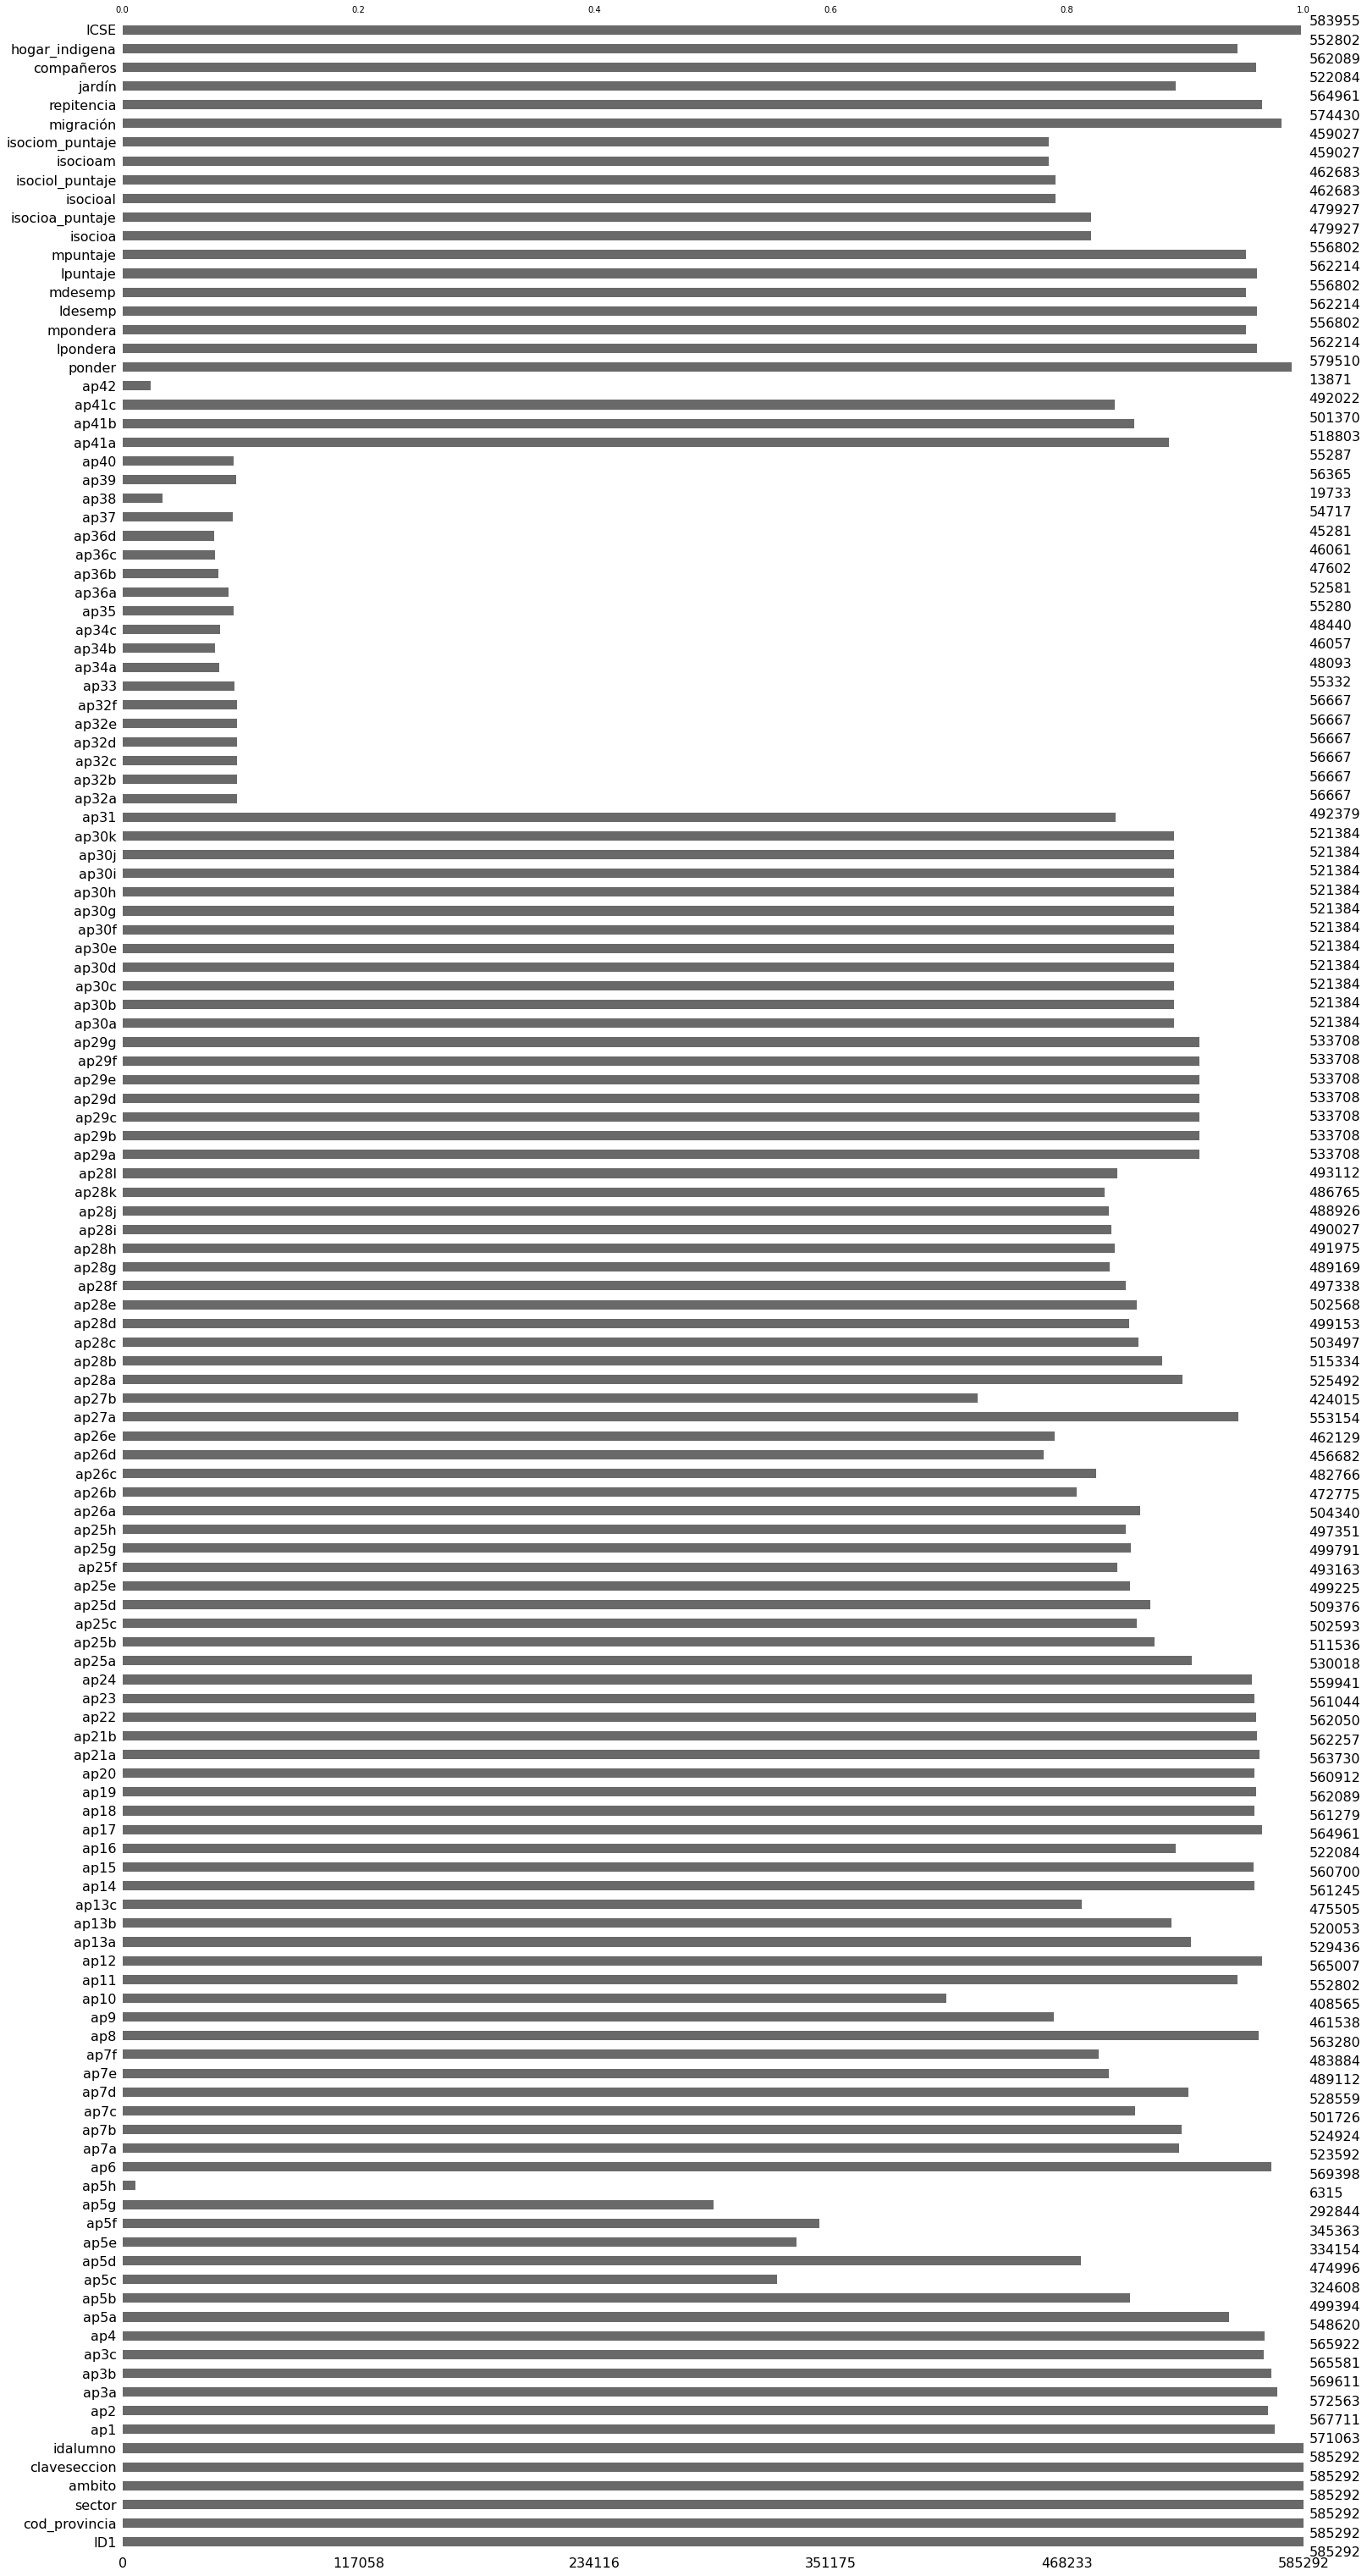

In [ ]:
msno.bar(df)

Quitamos todos los nulos de "**mpuntaje**", quien luego será nuestro "**target**".

In [ ]:
df = df[df['mdesemp'].notna()]

In [ ]:
df = df.rename(columns={'mdesemp': 'target'})

# Creamos un Dataframe con las variables seleccionadas y las renombramos

## Variables:

Se tomaron **27 variables** para el análisis de la problemática, el criterio de elección de las mismas fue establecido por los autores del estudio. 

Debido a la gran cantidad de NaN que contienen muchas variables, es necesario quitar muchas de ellas. 

Las variables fueron renombradas para un mejor entendimiento y un manejo más eficiente de la información. Las variables seleccionadas fueron:

Seleccionamos las variables a utilizar y las renombramos para que sea más fácil su lectura. 
* ap1 - ¿Cuántos años tenés? -  **edad**
* ap2 - Sexo -  **sexo**
* ap3a - ¿En qué país naciste? -  **nacionalidad**
* ap4 - ¿Con cuantas personas vives? -  **personas_vives**
* ap7a - ¿Cuáles de estas cosas hay en el lugar donde vivís?… Conexión a Internet -  **casa_internet**
* ap7c - ¿Cuáles de estas cosas hay en el lugar donde vivís? Computadora -   **casa_compu**
* ap9 - ¿Cuál es el máximo nivel educativo de tu mamá? -   **mama_niveledu**
* ap10 - ¿Cuál es el máximo nivel educativo de tu papá? -   **papa_niveledu**
* ap16 - ¿Fuiste a jardín de infantes? -  **jardin_inf**
* ap17 - ¿Repetiste de grado alguna vez? -  **repetiste**
* ap24 - Cuando están trabajando en clase… ¿Tus maestros/as te vuelven a explicar si no entendés?- **reexplic_doc**
* ap26a - Pensado en el último mes, ¿hiciste alguna de estas actividades en tu tiempo libre, fuera del horario escolar? Hice deporte- **hacen_deporte**
* ap26b - Pensado en el último mes, ¿hiciste alguna de estas actividades en tu tiempo libre, fuera del horario escolar? Leí un libro- **leen_libros**
* ap27a - ¿Tenés celular propio?- **celular_propio**
* ap27b - ¿Tenés celular propio?- **celular_internet**
* ap35 - ¿Buscás información o conversás sobre estos temas en internet? - **bus_inf**
* ap35 - ¿Hacés trabajos en grupo con estudiantes de otros grados?- **grupo_otros**
* ap36a - ¿En tu escuela pasan estas cosas? Los compañeros de grados más avanzados ayudan a los más pequeños- **ayudan_otros**
* ap41b - ¿Cómo fue resolver las pruebas y este cuestionario? Matemática- **interp_mate**
* compañeros - ¿Te llevás bien con tus compañeros y compañeras?- **companeros**
* cod_provincia: Número de jurisdicción --> 
> 1. Región Noroeste: Corrientes, Entre Ríos, Chaco, Misiones, y Formosa
> 2. Región Nordeste: Salta, Tucumán, Jujuy, Catamarca, Santiago del Estero y La Rioja
> 3. Región Pampeana: Buenos Aires, Córdoba, La Pampa y Santa Fe
> 4. Región de Cuyo: Mendoza, San Juan y San Luis
> 5. Región Patagonia: Rio Negro, Santa Cruz, Chubut, Neuquen y Tierra del Fuego
* sector: Sector de gestión --> 
> 1. Estatal
> 2. Privado
* ambito: Ámbito -->
> 1. Urbano
> 2. Rural
* lpuntaje - Puntaje en Lengua
* mpuntaje - Puntaje en Matemática
* ldesemp - Desempeño en Lengua
* mdesemp - Desempeño en Matemática
* isocioa - Indice socioeconómico del alumno

In [ ]:
df1 = df[['sector','ambito','cod_provincia','ap1','ap2','ap3a','ap4', 'ap7a', 
          'ap7c', 'ap9', 'ap10', 'ap16', 
          'ap17', 'ap24','ap26a','ap26b', 
          'ap27a','ap27b','ap31', 'ap35', 'ap36a', 
          'ap41b','compañeros','target','mpuntaje','ldesemp','lpuntaje','isocioa']].copy()
df1 = df1.rename(columns={'ap1': 'edad','ap2':'sexo','ap3a': 'nacionalidad' ,'ap4':'personas_vives', 'ap7a': 'casa_internet', 
                          'ap7c':'casa_compu', 'ap9':'mama_niveledu', 'ap10': 'papa_niveledu', 'ap16': 'jardin_inf', 
                          'ap17': 'repetiste', 'ap24': 'reexplic_doc','ap26a':'hacen_deporte','ap26b':'leen_libros', 
                          'ap27a':'celular_propio','ap27b':'celular_internet', 'ap31':'bus_inf',
                          'ap35': 'grupo_otros', 'ap36a': 'ayudan_otros', 
                          'ap41b':'interp_mate','compañeros':'companeros'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556802 entries, 0 to 585291
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sector            556802 non-null  int64  
 1   ambito            556802 non-null  int64  
 2   cod_provincia     556802 non-null  int64  
 3   edad              545254 non-null  float64
 4   sexo              542185 non-null  float64
 5   nacionalidad      546648 non-null  float64
 6   personas_vives    540555 non-null  float64
 7   casa_internet     501668 non-null  float64
 8   casa_compu        481549 non-null  float64
 9   mama_niveledu     441692 non-null  float64
 10  papa_niveledu     391360 non-null  float64
 11  jardin_inf        500236 non-null  float64
 12  repetiste         540193 non-null  float64
 13  reexplic_doc      535793 non-null  float64
 14  hacen_deporte     484077 non-null  float64
 15  leen_libros       454619 non-null  float64
 16  celular_propio    52

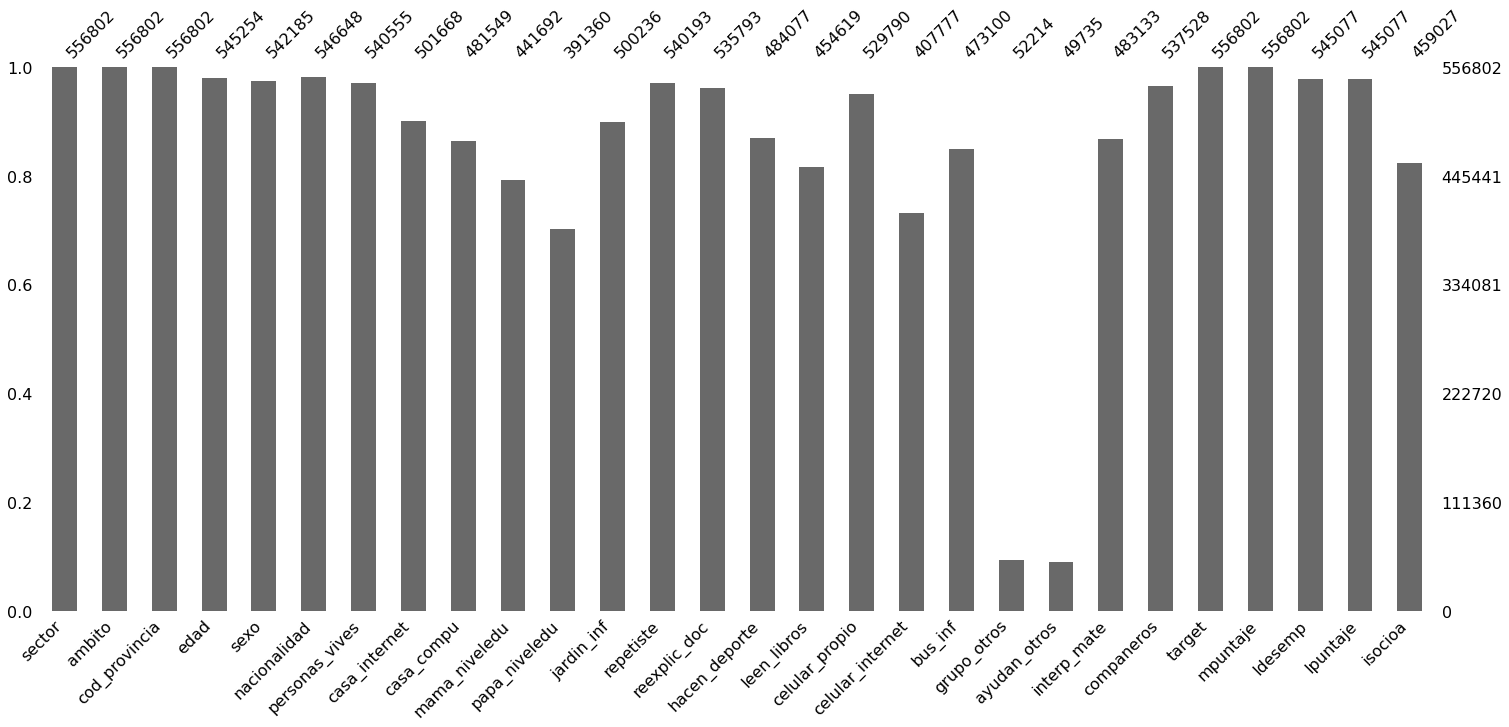

In [ ]:
# Visualizamos las variables seleccionadas en este nuevo df 
msno.bar(df1)

## Análisis univariado

Durante el transcurso del curso, este tipo de análisis (conjuntamente al bivariado y multivariado) fueron evolucionando conforme lo hacía nuestra comprensión del dataset y las herramientas incorporadas. 

A fines de ejemplo, se presentan algunas de las variables analizadas. 

In [ ]:
#Tipos de datos - tenemos int & floats
df1.dtypes

sector                int64
ambito                int64
cod_provincia         int64
edad                float64
sexo                float64
nacionalidad        float64
personas_vives      float64
casa_internet       float64
casa_compu          float64
mama_niveledu       float64
papa_niveledu       float64
jardin_inf          float64
repetiste           float64
reexplic_doc        float64
hacen_deporte       float64
leen_libros         float64
celular_propio      float64
celular_internet    float64
bus_inf             float64
grupo_otros         float64
ayudan_otros        float64
interp_mate         float64
companeros          float64
target              float64
mpuntaje            float64
ldesemp             float64
lpuntaje            float64
isocioa             float64
dtype: object

In [ ]:
#Principales Estadisticos:
df1.describe().T
# dada las características previamente descripta de algunos datos, los valores obtenidos 
# en mínimos y máximos representan estados de las variables descriptivas (ejemplo: si = 1 o no= 0)

count        mean         std        min         25%  \
sector            556802.0    0.693378    0.461092    0.00000    0.000000   
ambito            556802.0    0.888601    0.314625    0.00000    1.000000   
cod_provincia     556802.0    2.766165    0.953227    1.00000    2.000000   
edad              545254.0    0.413914    0.492534    0.00000    0.000000   
sexo              542185.0    0.495868    0.499983    0.00000    0.000000   
nacionalidad      546648.0    0.970325    0.169690    0.00000    1.000000   
personas_vives    540555.0    0.337405    0.472825    0.00000    0.000000   
casa_internet     501668.0    0.813861    0.389219    0.00000    1.000000   
casa_compu        481549.0    0.775161    0.417477    0.00000    1.000000   
mama_niveledu     441692.0    2.182971    0.769405    0.00000    2.000000   
papa_niveledu     391360.0    2.111879    0.787021    0.00000    2.000000   
jardin_inf        500236.0    0.985251    0.120547    0.00000    1.000000   
repetiste         540193.0    0.116745    0.378484    0.00000    0.000000   
reexplic_doc      535793.0    0.952023    0.213719    0.00000    1.000000   
hacen_deporte     484077.0    0.819514    0.384592    0.00000    1.000000   
leen_libros       454619.0    0.612801    0.487110    0.00000    0.000000   
celular_propio    529790.0    0.776691    0.416464    0.00000    1.000000   
celular_internet  407777.0    0.912805    0.282121    0.00000    1.000000   
bus_inf           473100.0    0.383433    0.486223    0.00000    0.000000   
grupo_otros        52214.0    0.640154    0.479960    0.00000    0.000000   
ayudan_otros       49735.0    0.684769    0.464612    0.00000    0.000000   
interp_mate       483133.0    0.695639    0.460137    0.00000    0.000000   
companeros        537528.0    0.775126    0.417500    0.00000    1.000000   
target            556802.0    0.588809    0.492050    0.00000    0.000000   
mpuntaje          556802.0  501.053630  101.470402  214.72127  424.094528   
ldesemp           545077.0    0.834807    0.371355    0.00000    1.000000   
lpuntaje          545077.0  518.760358   86.994189  241.55554  452.910680   
isocioa           459027.0    2.039392    0.597931    1.00000    2.000000   

                        50%         75%        max  
sector              1.00000    1.000000    1.00000  
ambito              1.00000    1.000000    1.00000  
cod_provincia       3.00000    3.000000    5.00000  
edad                0.00000    1.000000    1.00000  
sexo                0.00000    1.000000    1.00000  
nacionalidad        1.00000    1.000000    1.00000  
personas_vives      0.00000    1.000000    1.00000  
casa_internet       1.00000    1.000000    1.00000  
casa_compu          1.00000    1.000000    1.00000  
mama_niveledu       2.00000    3.000000    3.00000  
papa_niveledu       2.00000    3.000000    3.00000  
jardin_inf          1.00000    1.000000    1.00000  
repetiste           0.00000    0.000000    2.00000  
reexplic_doc        1.00000    1.000000    1.00000  
hacen_deporte       1.00000    1.000000    1.00000  
leen_libros         1.00000    1.000000    1.00000  
celular_propio      1.00000    1.000000    1.00000  
celular_internet    1.00000    1.000000    1.00000  
bus_inf             0.00000    1.000000    1.00000  
grupo_otros         1.00000    1.000000    1.00000  
ayudan_otros        1.00000    1.000000    1.00000  
interp_mate         1.00000    1.000000    1.00000  
companeros          1.00000    1.000000    1.00000  
target              1.00000    1.000000    1.00000  
mpuntaje          490.64267  571.469698  800.48541  
ldesemp             1.00000    1.000000    1.00000  
lpuntaje          515.82318  582.635560  760.13177  
isocioa             2.00000    2.000000    3.00000

###**Análisis de variable: ldesemp**

-ldesemp : Nivel de desempeño en Lengua
Puede tomar los siguientes valores:

> * Por debajo del nivel básico
> * Básico
> * Satisfactorio
> * Avanzado

In [ ]:
df1['ldesemp'].unique()
#indicaria que tenemos Nan en esta variable

array([ 1.,  0., nan])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


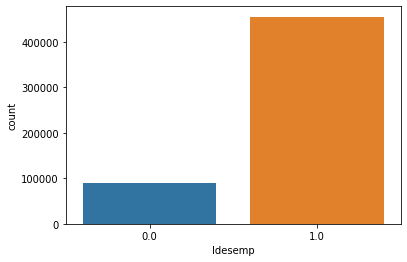

In [ ]:
sns.countplot(df1['ldesemp'])
#Nos indicaria que hay mas alumnos con un desempeño satisfactorio o avanzado

In [ ]:
#Podemos analizar las cantidades 
frec = df1["ldesemp"].value_counts()
frec

1.0    455034
0.0     90043
Name: ldesemp, dtype: int64

In [ ]:
#Es posible  guardar esa información en un dataframe
frecDf = pd.DataFrame(frec)
frecDf

ldesemp
1.0   455034
0.0    90043

In [ ]:
#Nombramos la columna como Frecuencia Absoluta = FrecAbs
frecDf.rename(columns={'ldesemp':'FrecAbs'},inplace=True)
frecDf

FrecAbs
1.0   455034
0.0    90043

In [ ]:
#Obtenemos los valores de las Frecuencias Absolutas
FrecAbsValores = frecDf["FrecAbs"].values
FrecAbsValores

array([455034,  90043])

In [ ]:
#Calculamos la Frecuencia Relativa en porcentajes
frecDf["FrecRel%"] = round(100 * frecDf["FrecAbs"]/len(df.ldesemp),2)
frecDf

FrecAbs  FrecRel%
1.0   455034     81.72
0.0    90043     16.17

--------------

###**Analisis de variable: isocioa** 

-isocioamb :  Indice socioeconómico del alumno ponderador Matemática	
En este caso puede tomar los siguientes valores:
1. Bajo
2. Medio	
3. Alto


In [ ]:
#revisamos la variable a explorar (Isocioam)
df1.isocioa.value_counts()

2.0    294203
3.0     91453
1.0     73371
Name: isocioa, dtype: int64

In [ ]:
cantidad_valores = list(df1.isocioa.value_counts())
cantidad_valores

[294203, 91453, 73371]

In [ ]:
valores_variable = [2, 3, 1]

(array([ 73371.,      0.,      0.,      0.,      0., 294203.,      0.,
             0.,      0.,  91453.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

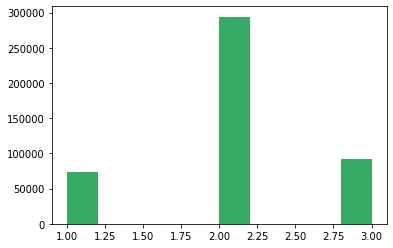

In [ ]:
#creamos un histograma con los valores
plt.hist(df1.isocioa, color=['#37AB65'])

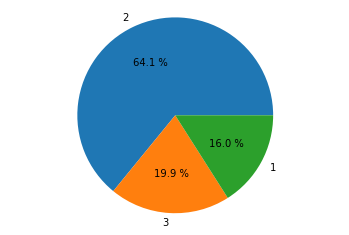

In [ ]:
#Grafico de torta
plt.pie(cantidad_valores,labels=valores_variable , autopct="%0.1f %%",)
plt.axis("equal")
plt.show()

En ambos gráficos observamos que hay menor cantidad de alumnos con un índice socioeconómico bajo (16%), seguidos por aquellos de alto índice (19%). La mayor cantidad de alumnos cuentan con un índice socioeconómico medio (64.1%)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


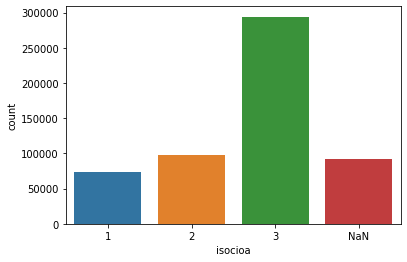

In [ ]:
df1_isocioa = df1['isocioa']
df1_isocioa['isocioa'] = df1['isocioa'].fillna('NaN')
sns.countplot( data = df1_isocioa, x='isocioa')
plt.xticks(np.arange(4), ("1", "2","3","NaN"))
plt.show()

No obstante, si realizamos un gráfico considerando los valores nulos, notamos que hay una gran proporción de ellos (cercana al 20%). 

--------------

###**Analisis de variable: sector** 

-sector :  sector de gestión

La variable puede tomar 2 valores:
1. Estatal
2. Privado	


In [ ]:
df1['sector'].unique()



array([0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


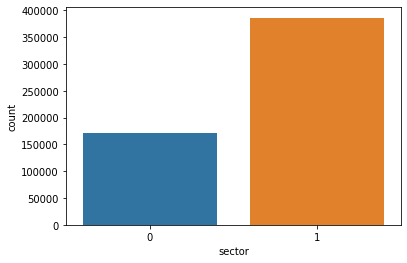

In [ ]:
sns.countplot(df1['sector'])
#Nos indicaria que hay mas alumnos en el sector estatal

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


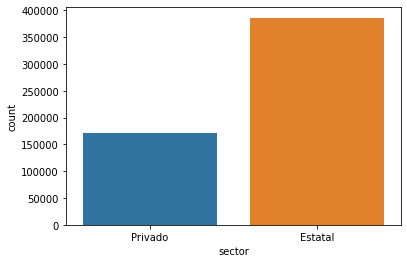

In [ ]:
# Corregimos el gráfico para que nos muestre cada sector:
df1_sec = df1['sector']
df1_sec['sector'] = df1['sector'].fillna('NaN')
sns.countplot(data=df1_sec, x='sector')
plt.xticks(np.arange(2), ("Privado", "Estatal"))
plt.show()

--------------

###**Analisis de variable: ámbito** 

-ambito :  ambito educativo del alumno

La variable puede tomar 2 valores:
1. Urbano
2. Rural	

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


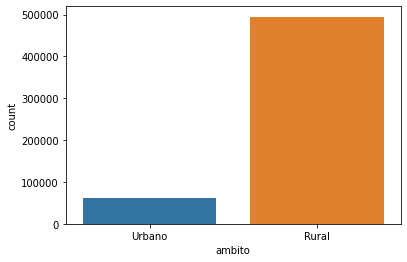

In [ ]:
#Corregimos los valores NaN del df y los graficamos
df1_amb = df1['ambito']
df1_amb['ambito'] = df1['ambito'].fillna('NaN')
sns.countplot(data=df1_amb, x='ambito')
plt.xticks(np.arange(2), ("Urbano", "Rural"))
plt.show()
#Nos mostrarìa que hay mayor cantidad de alumnos que concurren a escuelas en ámbitos rurales

--------------

###**Analisis de variable: cod_provincia** 

-código de provincia:  es el número de jurisdicción, originalmente separado en cada una de las provincias del país

La variable puede tomar ahora 5 valores:
 
1. Región Noroeste: Corrientes, Entre Ríos, Chaco, Misiones, y Formosa
2. Región Nordeste: Salta, Tucumán, Jujuy, Catamarca, Santiago del Estero y La Rioja
3. Región Pampeana: Buenos Aires, Córdoba, La Pampa y Santa Fe
4. Región de Cuyo: Mendoza, San Juan y San Luis
5. Región Patagonia: Rio Negro, Santa Cruz, Chubut, Neuquen y Tierra del Fuego

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


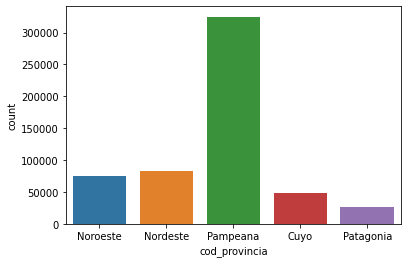

In [ ]:
df1_sec = df1['cod_provincia']
df1_sec['cod_provincia'] = df1['cod_provincia'].fillna('NaN')
sns.countplot(data=df1_sec, x='cod_provincia')
plt.xticks(np.arange(5), ('Noroeste', 'Nordeste','Pampeana','Cuyo','Patagonia'))
plt.show()
#Nos indicaria que hay mas alumnos en la región pampeana (que incluye Bs.As.)

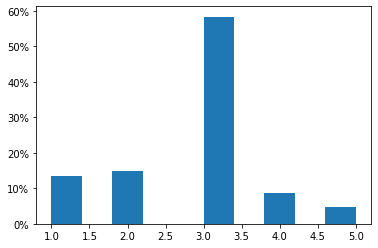

In [ ]:
#hisotgrama con matplotlib - para observar el porcentaje de evaluaciones de cada sector provincial
plt.hist(df1.cod_provincia, weights=np.ones(len(df1.cod_provincia)) / len(df1.cod_provincia))

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

#Casi un 60% de los alumnos es de la región 3
# El resto ocupa alrededor de un 10%, siendo la región patagonica aquella con menos alumnos 

--------------

###**Analisis de variable: edad** 

-edad:  edad del alumno encuestado

La variable puede tomar 2 valores:
* 11 años
* 12 años

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


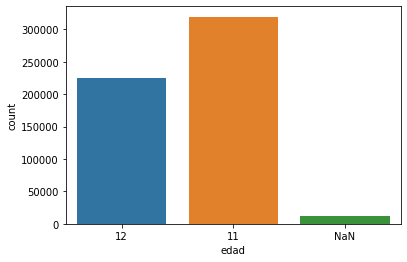

In [ ]:
df1_edad = df1['edad']
df1_edad['edad'] = df1['edad'].fillna('NaN')
sns.countplot(data=df1_edad, x='edad')
plt.xticks(np.arange(3), ("12", "11","NaN"))
plt.show()
#Observamos que la mayoria de los alumnos tiene 11 años, aunque existen nulos en esta variable

--------------

###**Analisis de variable: sexo** 

-sexo:  sexo de los alumnos encuestados

La variable puede tomar ahora 2 valores:
- hombres 
- mujeres

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


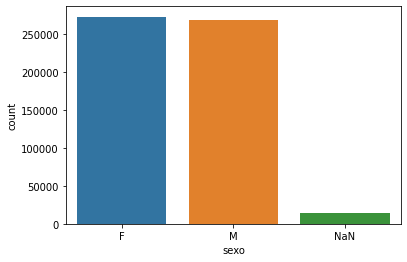

In [ ]:
df1_sex = df1['sexo']
df1_sex['sexo'] = df1['sexo'].fillna('NaN')
sns.countplot(data=df1_sex, x='sexo')
plt.xticks(np.arange(3), ("F", "M","NaN"))
plt.show()
#Notamos que presentan valores similares. Existen valores nulos en esta variable

--------------

###**Analisis de variables: otras** 

Dada la extensión del presente trabajo se procede a revisar rapidamente el dataframe generado hasta este punto y algunas de las variables restantes. 

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556802 entries, 0 to 585291
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sector            556802 non-null  int64  
 1   ambito            556802 non-null  int64  
 2   cod_provincia     556802 non-null  int64  
 3   edad              545254 non-null  float64
 4   sexo              542185 non-null  float64
 5   nacionalidad      546648 non-null  float64
 6   personas_vives    540555 non-null  float64
 7   casa_internet     501668 non-null  float64
 8   casa_compu        481549 non-null  float64
 9   mama_niveledu     441692 non-null  float64
 10  papa_niveledu     391360 non-null  float64
 11  jardin_inf        500236 non-null  float64
 12  repetiste         540193 non-null  float64
 13  reexplic_doc      535793 non-null  float64
 14  hacen_deporte     484077 non-null  float64
 15  leen_libros       454619 non-null  float64
 16  celular_propio    52

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


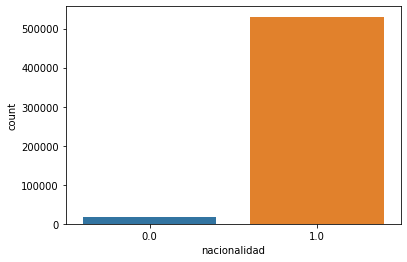

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


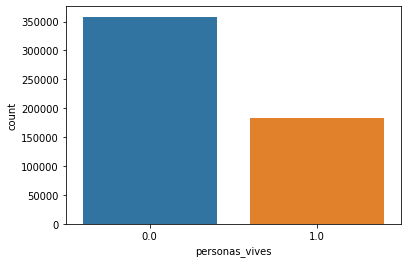

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


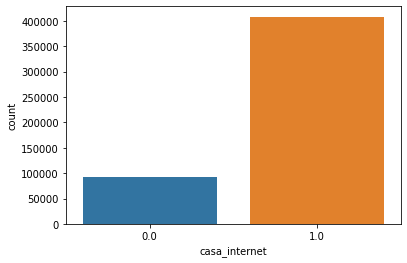

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


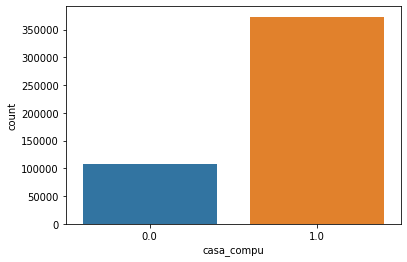

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


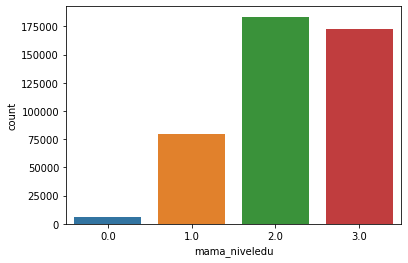

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


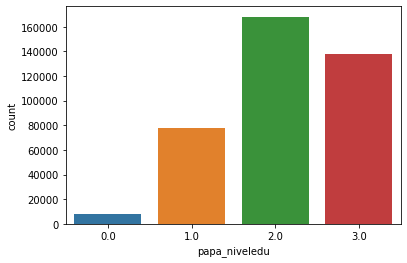

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


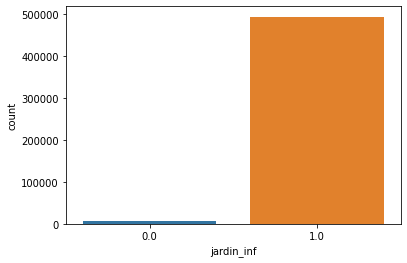

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


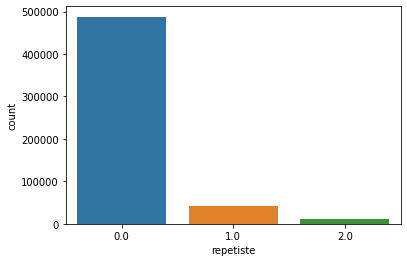

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


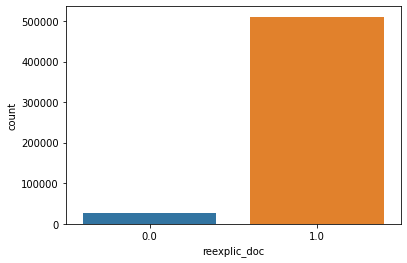

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


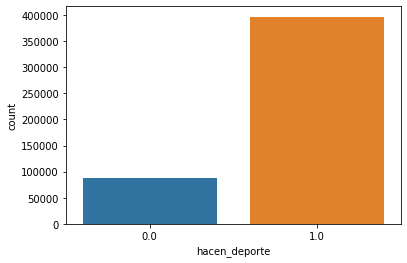

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


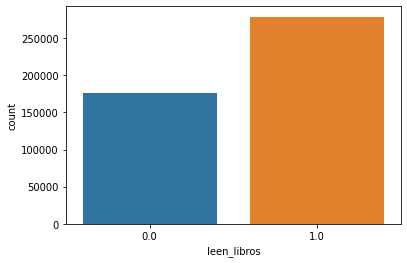

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


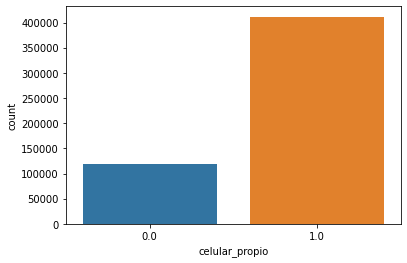

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


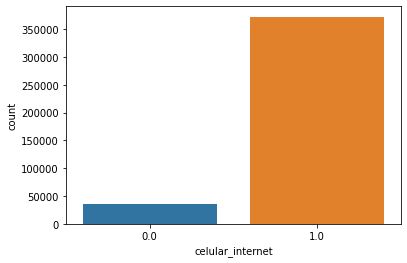

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


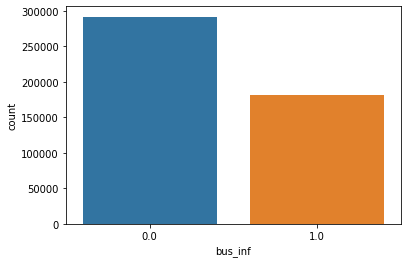

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


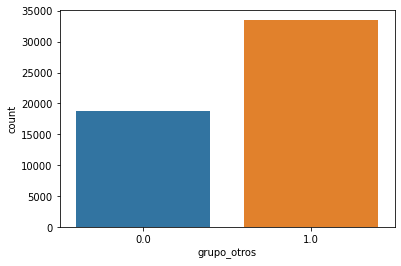

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


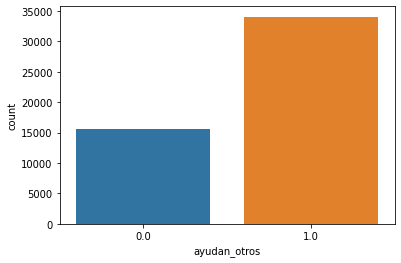

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


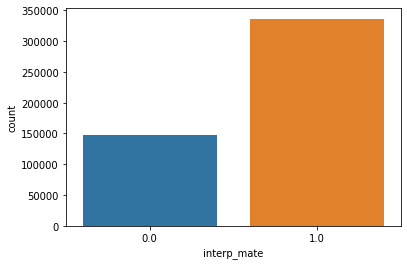

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


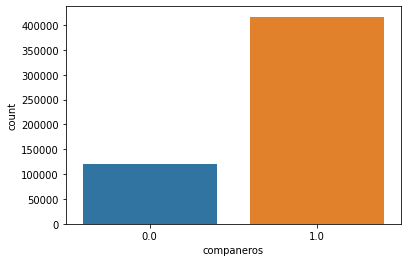

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


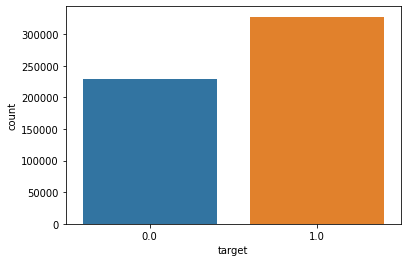

In [ ]:
#Es posible realizar una rápida revisión de algunas de las variables a traves de la siguiente orden:
for nombre_columna in df1.columns[5:24]:
    sns.countplot(df1[nombre_columna])
    plt.show()


Algunas de las observaciones obtenidas a partir de este tipo de análisis son:

* La variable "edad", nos indica la edad de los alumnos. El censo se realizó a los alumnos de 6 grados de la primaria, por lo que el 94% de los alumnos tienen menos de 13 años. El 5% de los alumnos tiene más de 13 años, esto abarca a aquellos que repitieron el grado escolar como a aquellos alumnos que cumplen los años posterior al mes de julio, lo cual hace que tengan por su fecha de nacimiento un año más.

* El censo se hizo a la misma cantidad de mujeres que de varones.

* El censo se efectuó en Argentina, por lo que más del 97 % de los alumnos son argentinos, y solamente un 3% de los alumnos es extranjero. 

* El 66,25% de los estudiantes que respondieron el censo viven con más de 3 personas en su casa.

* El 81.38% de los estudiantes que respondieron el censo tienen internet en su casa.

* El 77.51% de los estudiantes que respondieron tienen una computadora en su casa.

* El 41.53% de los estudiantes que respondieron su mamá tiene un nivel de educación secundaria.

* El 42.95% de los estudiantes que respondieron su papá tiene un nivel de educación secundaria. 

* El 98.52% de los estudiantes que respondieron asistieron al jardín de infantes.

* El 90.33% de los estudiantes que respondieron no repitieron de grado.

* El 73.57% de los estudiantes dicen que el docente no vuelve a repetir la explicación si no entendieron el problema. 

## Análisis bivariado - Multivariado

El análisis en esta etapa resultó complicada debido a la naturaleza categórica de las variables. 

In [ ]:
#Categórica vs. categórica 
pd.crosstab(df1.ldesemp, df1.target)

target      0.0     1.0
ldesemp                
0.0       67208   22835
1.0      155919  299115

In [ ]:
#Valores en relativo
pd.crosstab(df1.ldesemp, df1.target, normalize=True)

target        0.0       1.0
ldesemp                    
0.0      0.123300  0.041893
1.0      0.286049  0.548757

## El problema de los gráficos en el análisis bivariado y multivariado

A continuación se agregan algunas de las funciones aplicadas en trabajos previos buscando resolver graficamente la representación de las variables analizadas

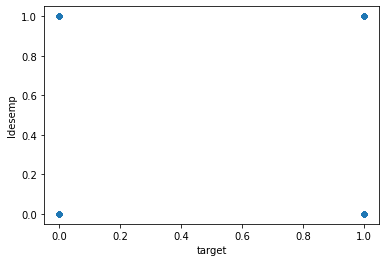

In [ ]:
#Scatterplot - no tiene sentido para nuestras variables - EJEMPLO:
df1.plot.scatter(x='target', y='ldesemp')

In [ ]:
#De manera similar, aplicar otros gráficos no nos brinda mucha información

#Si deseamos crear un Pairplot del dataset 
#plt.figure(dpi=120)
#sns.pairplot(df1)
#plt.show()

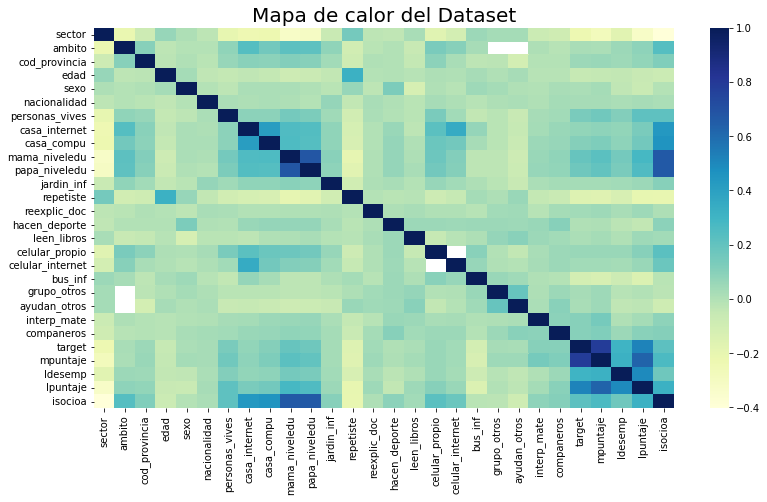

In [ ]:
#Realizamos un mapa de calor con df1:
fig, ax = plt.subplots(figsize=(13,7))

sns.heatmap(df1.corr(), cmap="YlGnBu")
plt.title('Mapa de calor del Dataset', fontsize = 20)
plt.show()
#En df1plot encontramos muchos datos pero el mapa de calor nos brinda una idea de posibles correlaciones

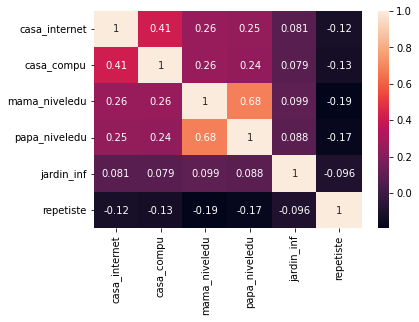

In [ ]:
#Generamos df2 para eviar posibles cambios en nuestro df 
df2 = df1

#Es posible seleccionar algunas de las columnas de interés para mejor visualización
df_small = df2.iloc[:,7:13]

correlation_mat = df_small.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

#Aqui vemos por ejemplo que parece existir una correlación más elevada entre los niveles educativos de los padres

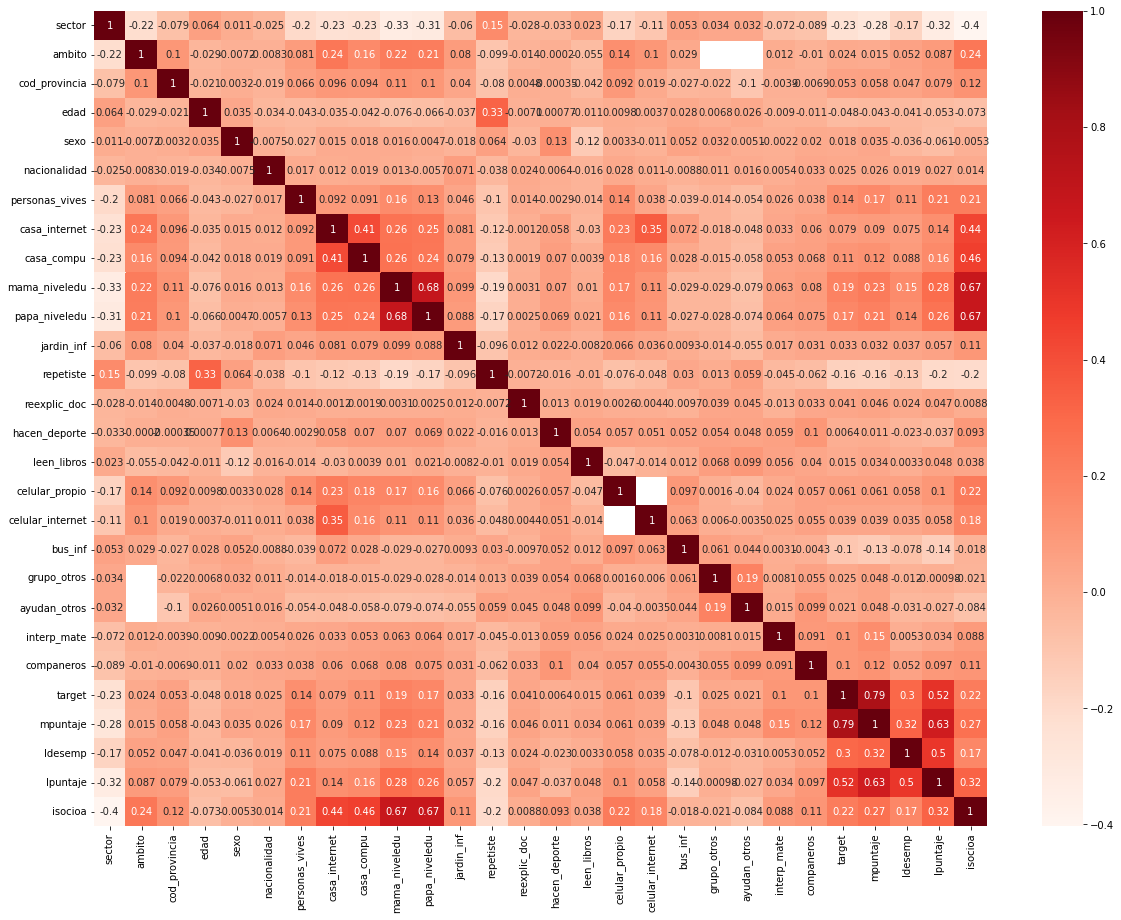

target      1.000000
mpuntaje    0.790036
ldesemp     0.304919
lpuntaje    0.521067
Name: target, dtype: float64

In [ ]:
#Si usamos de la correlación de Pearson 
plt.figure(figsize=(20,15)) 
cor = df2.corr() 
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds) 
plt.show()
#Correlación con la variable de salida 
cor_target = abs(cor["target"])
#Selección de características correlacionadas por un índice mayor a 0.3
características_relevantes = cor_target[cor_target>0.3] 
características_relevantes

Las variables que cumplen esa característica son mpuntaje, ldesemp, y lpuntaje. 
El siguiente paso es analizar la correlación entre las variables de interés 

In [ ]:
#Correlacion entre si
print(df2[["mpuntaje","lpuntaje"]].corr()) 
print(df2[["ldesemp","mpuntaje"]].corr())
# Parece haber correlación entre lpuntaje y mpuntaje: esto es lo esperado ya que los alumnos que aprueban lengua, posiblemente se desempeñen mejor en matemáticas
# No parece haber correlacion entre ldesemp y mpuntaje  

          mpuntaje  lpuntaje
mpuntaje  1.000000  0.631669
lpuntaje  0.631669  1.000000
           ldesemp  mpuntaje
ldesemp   1.000000  0.321869
mpuntaje  0.321869  1.000000


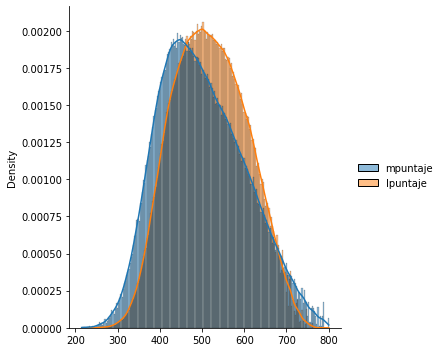

In [ ]:
# Si analizamos la densidad de 2 de nuestras variables de interes a traves de displot:
sns.displot(df1[["mpuntaje",'lpuntaje']], kde=True, stat="density")

#podemos notar que hay una cierta similitud en la dispersión de las áreas
#pero no un solapamiento total de los valores

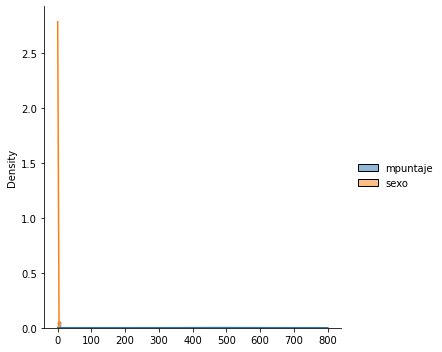

In [ ]:
#Pero este tipo de gráfico (displot) no es posible aplicar en cualquier combinación de variables. Ejemplo:
sns.displot(df1[["mpuntaje",'sexo']], kde=True, stat="density")
# ya que sexo solo tiene 2 estados, y el puntaje atraviesa una serie de valores

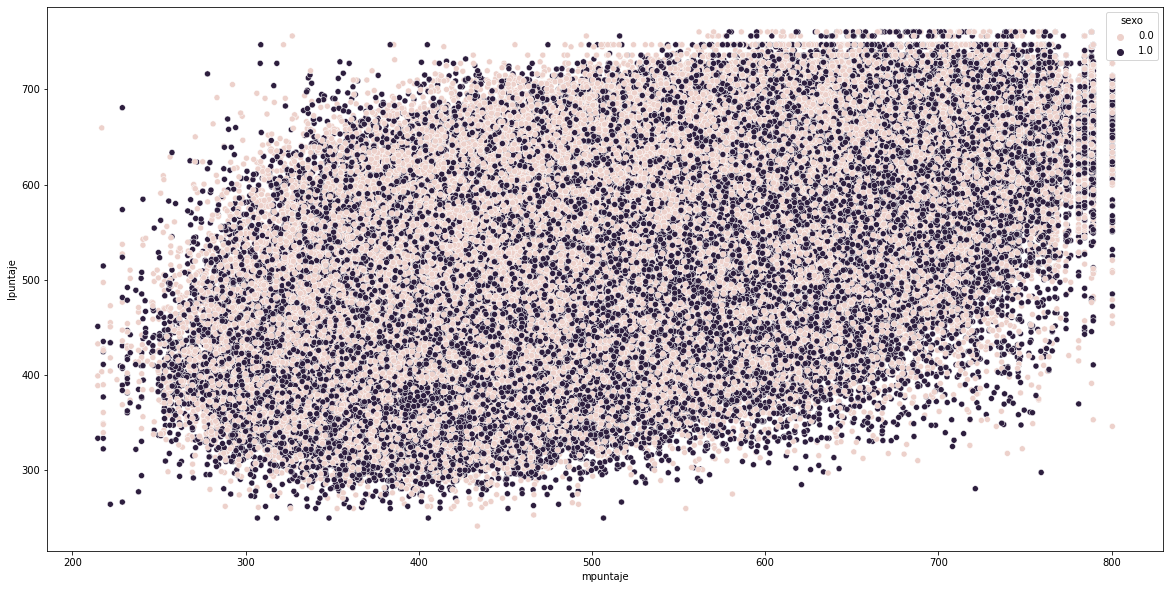

In [ ]:
#Podemos considerar realizar un scatterplot, donde tomamos las variables del puntaje en ambas materias
# (lengua y matemáticas) respecto al sexo
plt.figure(figsize=(20,10))
sns.scatterplot(data=df1, x="mpuntaje",y="lpuntaje",hue = 'sexo')
plt.show()

#En este caso vemos que hay una distribución homogenea de los datos, sin una tendencia marcada a simple vista

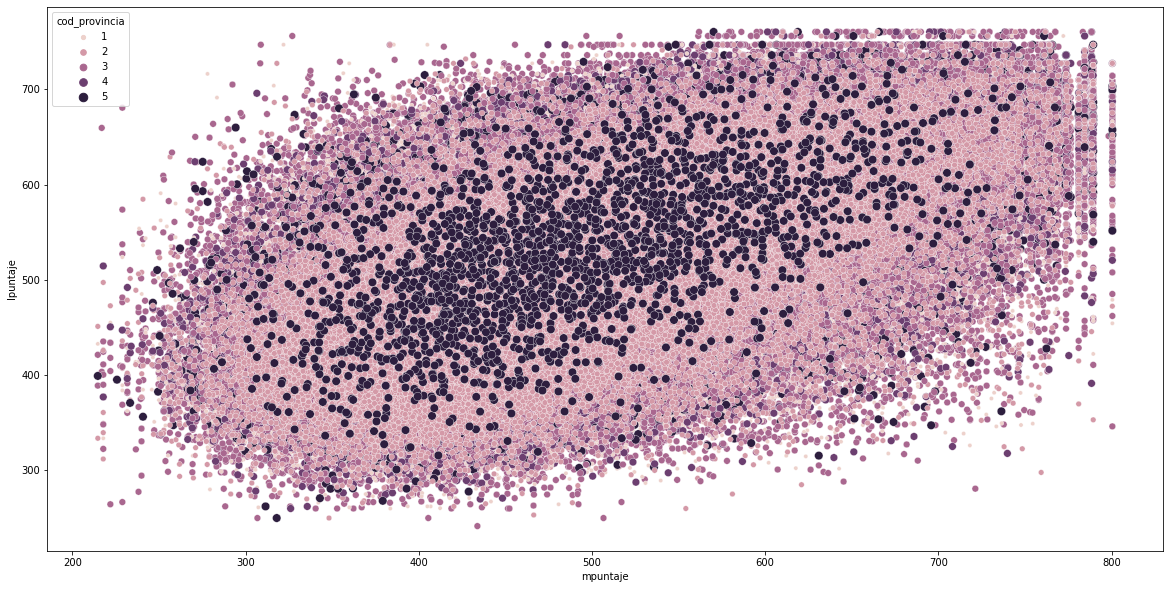

In [ ]:
# En caso de utilizar el mismo gráfico para las variables de puntajes en lengua y matemáticas
# respecto al código de provincia, también resulta dificultoso obtener una conclusión al respecto
plt.figure(figsize=(20,10))
sns.scatterplot(data=df1, x="mpuntaje",y="lpuntaje",hue = 'cod_provincia',size='cod_provincia')
plt.show()
#Posiblemente los datos parecen concentrarse en valores medios, mas que extremos en ambos casos

In [ ]:
#Creamos un sample del dataset para utilizar el pandas_profiling

df2 = df1.sample(10000)
profile = pandas_profiling.ProfileReport(df2)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Los índices del profile que nos permiten un mejor análisis dadas nuestras variables son Cramer's y Phik
# A modo de ejemplo se desarrolla el análisis realizado sobre las variables con Phik
# se usan los valores seleccionados para el profile

#Importamos librerias
import phik
from phik.report import plot_correlation_matrix
from phik import report

#Por default la libreria elimina los Nans
phik_overview = df2.phik_matrix()
phik_overview.round(2) # se redondea a 2 decimales
interval_cols =df2
phik_overview = df2.phik_matrix(interval_cols=interval_cols)


interval columns not set, guessing: ['sector', 'ambito', 'cod_provincia', 'edad', 'sexo', 'nacionalidad', 'personas_vives', 'casa_internet', 'casa_compu', 'mama_niveledu', 'papa_niveledu', 'jardin_inf', 'repetiste', 'reexplic_doc', 'hacen_deporte', 'leen_libros', 'celular_propio', 'celular_internet', 'bus_inf', 'grupo_otros', 'ayudan_otros', 'interp_mate', 'companeros', 'target', 'mpuntaje', 'ldesemp', 'lpuntaje', 'isocioa']


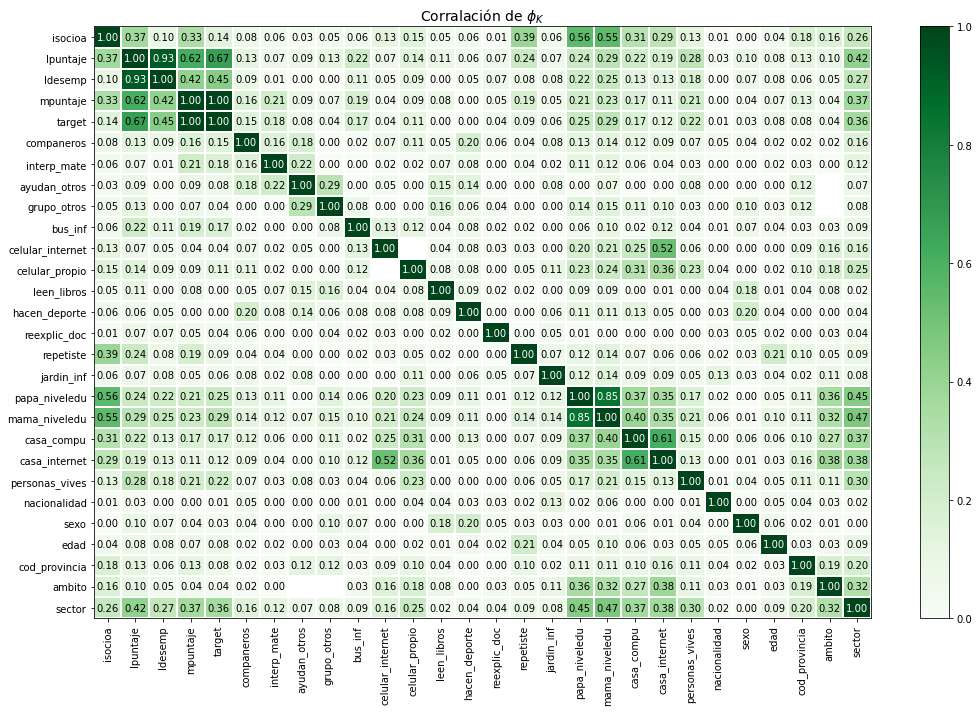

In [ ]:
#Se procede a realizar el gráfico
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, vmin=0, vmax=1, color_map="Greens", 
                        title=r"Corralación de $\phi_K$", figsize=(15, 10))
plt.tight_layout()

Este profile nos permite analizar una muestra de nuestro dataset. 
Aqui notamos las características de cada variable y las posibles correlaciones entre algunas de ellas a través de los índices de Cramer's V y de PhiK. 
Algunas de ellas son: 
- el indice socioeconómico del alumno y el nivel educativo de los padres
- el nivel educativo de los padres y el sector en donde asisten los alumnos
- hay relaciones intuitivas, por ejemplo en la presencia de internet en la casa y la posibilidad de tener computadora o celular
- el puntaje y el desempeño en lengua tienen un alto indice de correlación (0.9), asi como el puntaje y desempeño en matemáticas (1.0), lo cual es esperable dado que son variables que provienen de la ponderación de las otras

Consideramos que aunque algunos los valores son bajos para indicar una fuerte correlación entre si, pueden ser útiles en análisis posteriores.


# Imputación de datos

La gran cantidad de nulos en el dataset original como a traves de los tratamientos anteriores, nos llevó a probar distintos métodos de limpieza. 

A continuación se muestra la imputación final realizada a los datos. Creemos no obstante, que es posible mejorarla o incluso mejorar las etapas previas (selección y análisis de variables) que podrían llevar a una mejora de las etapas posteriores (desarrollo y mejora de algoritmos).

## Imputación sensible

Para aquellas variables con un valor bajo de NaN (menos del 10%):
- edad
- nacionalidad
- sexo
- casa_internet

### Limpieza de nulos: "**edad**"

Esta variable cuenta con un 2% de NaN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


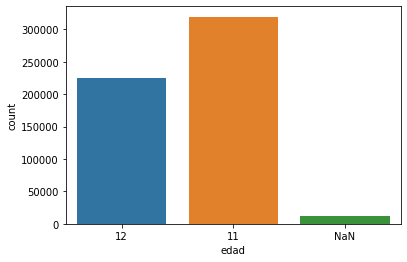

In [ ]:
#Realizamos un gráfico de esta variable
df1_edad = df1['edad']
df1_edad['edad'] = df1['edad'].fillna('NaN')
sns.countplot(data=df1_edad, x='edad')
plt.xticks(np.arange(3), ("12", "11","NaN"))
plt.show()

In [ ]:
df1['edad'].value_counts(dropna = False)

0.0    319566
1.0    225688
NaN     11548
Name: edad, dtype: int64

In [ ]:
#Podemos analizar las cantidades de manera similar a la previamente aplicada
frec_edad = df1_edad["edad"].value_counts()
frec_edadDf = pd.DataFrame(frec_edad)
frec_edadDf.rename(columns={'edad':'FrecAbs'},inplace=True)
frec_edadDf["FrecRel%"] = round(100 * frec_edadDf["FrecAbs"]/len(df1_edad.edad),2)
frec_edadDf

FrecAbs  FrecRel%
0.0   319566     57.39
1.0   225688     40.53
NaN    11548      2.07

Comprobamos que el valor de vacios es del 2%, para no modificar los porcentajes de las diferentes edades, decidimos dividir los vacios en iguales partes en las dos categorias "11" y "12" respectivamente.

In [ ]:
df1['edad'].value_counts(dropna = False)/len(df1['edad'])*100

0.0    57.393113
1.0    40.532900
NaN     2.073987
Name: edad, dtype: float64

In [ ]:
cant_edad = df1['edad'].isna().sum()
np.random.seed(0)
random_edad = (np.random.uniform(size=cant_edad) < 0.5) * 1

In [ ]:
df1.loc[df1['edad'].isna(),'edad'] = random_edad

In [ ]:
df1['edad'].value_counts(dropna = False)

0.0    325242
1.0    231560
Name: edad, dtype: int64

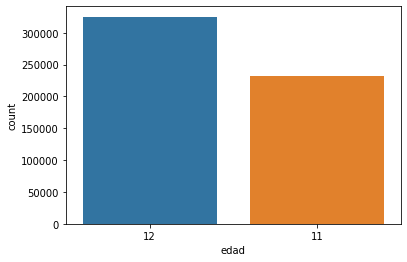

In [ ]:
sns.countplot(data=df1, x='edad')
plt.xticks(np.arange(2), ("12", "11"))
plt.show()

De esta manera los Nan se han "repartido" entre ambas posibilidades de la variable.

### Reemplazar los vacios en **"Nacionalidad"**

En este caso la cantidad de NaN es similar a la opcion de "extranjeros". 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


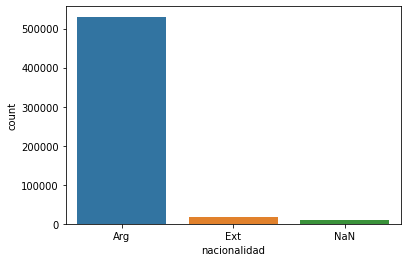

In [ ]:
df1_nac = df1['nacionalidad']
df1_nac['nacionalidad'] = df1['nacionalidad'].fillna('NaN')
sns.countplot(data=df1_nac, x='nacionalidad')
plt.xticks(np.arange(3), ("Arg", "Ext","NaN"))
plt.show()

Comprobamos que el valor de vacios es menos del 2%, en este caso considerando que el país donde se realizó la escuesta es Argentina, los vacios serán considerados como Argentinos. 

In [ ]:
df1['nacionalidad'].value_counts(dropna = False)/len(df1['nacionalidad'])*100

1.0    95.262948
0.0     2.913423
NaN     1.823629
Name: nacionalidad, dtype: float64

In [ ]:
df1['nacionalidad'] = df1['nacionalidad'].fillna(0)

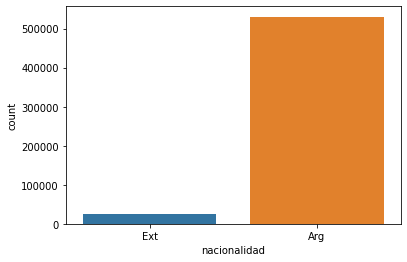

In [ ]:
sns.countplot(data=df1, x='nacionalidad')
plt.xticks(np.arange(2), ("Ext", "Arg"))
plt.show()

In [ ]:
df1['nacionalidad'].value_counts(dropna = False)/len(df1['nacionalidad'])*100

1.0    95.262948
0.0     4.737052
Name: nacionalidad, dtype: float64

### Tratamiento de los vacios en la variable **"Sexo"**

Tal como previamente mencionamos, las cantidades de ambas opciones de esta variable son similares. 

Visualizamos los datos dentro de la variable:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


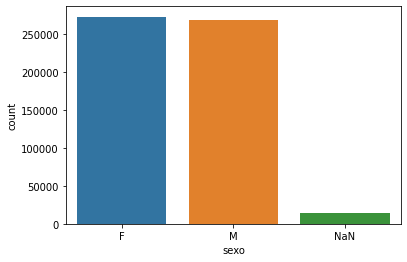

In [ ]:
df1_sex = df1['sexo']
df1_sex['sexo'] = df1['sexo'].fillna('NaN')
sns.countplot(data=df1_sex, x='sexo')
plt.xticks(np.arange(3), ("F", "M","NaN"))
plt.show()

In [ ]:
df1['sexo'].value_counts(dropna = False)/len(df1['sexo'])*100

0.0    49.089802
1.0    48.285028
NaN     2.625170
Name: sexo, dtype: float64

Teniendo en cuenta que la cantidad de encuentados hombres y mujeres es prácticamente igual, se crea una lista con valores aleatorio 50%/50%, que tiene la misma longitud que la variabe cant_sex. Uso la semilla (seed) aleatoria número (0). 

In [ ]:
cant_sex = df1['sexo'].isna().sum()
np.random.seed(0)
random_ap2 = (np.random.uniform(size=cant_sex) < 0.5) * 1

In [ ]:
df1.loc[df1['sexo'].isna(),'sexo'] = random_ap2

In [ ]:
df1['sexo'].value_counts(dropna = False)/len(df1['sexo'])*100

0.0    50.380387
1.0    49.619613
Name: sexo, dtype: float64

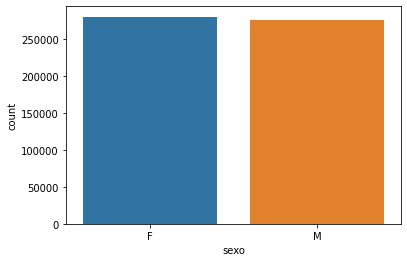

In [ ]:
sns.countplot(data=df1, x='sexo')
plt.xticks(np.arange(2), ("F", "M"))
plt.show()

De esta manera, nuevamente logramos integrar los Nan a nuestros datos.

### Tratamiento de los vacios en la variable "**casa_internet**"

Al tratarse de otra variable con bajo porcentaje de NaN respecto al total de datos, se crea una lista con valores aleatorio 80%/20%, que tiene la misma longitud que la variable cant_cint. 
Se usa la semilla (seed) aleatoria número (1), y se agrega el 80% de ceros.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


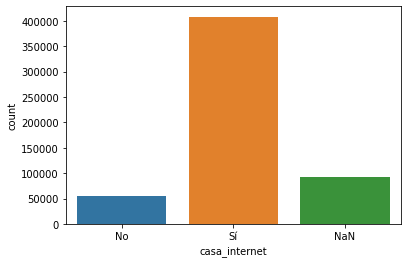

In [ ]:
df1_int = df1['casa_internet']
df1_int['casa_internet'] = df1['casa_internet'].fillna('NaN')
sns.countplot(data=df1_int, x='casa_internet')
plt.xticks(np.arange(3), ("No", "Sí","NaN"))
plt.show()
#Visualiazamos nuestros datos originales

In [ ]:
df1['casa_internet'].value_counts(dropna = False)/len(df1['casa_internet'])*100
#En porcentajes hay un 9.5% de NaN 

1.0    73.327323
0.0    16.770773
NaN     9.901904
Name: casa_internet, dtype: float64

Teniendo en cuenta que la cantidad de encuentados el 70% de los alumnos cuenta con conexión a internet, se crea una lista con valores aleatorio 70%/30%, que tiene la misma longitud que la variabe casa_internet. Uso la semilla (seed) aleatoria número (1). 

In [ ]:
cant_cint = df1['casa_internet'].isna().sum()
np.random.seed(1)
random_cint = (np.random.uniform(size=cant_cint) < 0.7) * 1

In [ ]:
df1.loc[df1['casa_internet'].isna(),'casa_internet'] = random_cint
df1['casa_internet'].value_counts(dropna=False)

1.0    446905
0.0    109897
Name: casa_internet, dtype: int64

In [ ]:
df1['casa_internet'].value_counts(dropna = False)/len(df1['casa_internet'])*100
#Notamos como la incorporación de Nan cambia los porcentajes previamente observados

1.0    80.262822
0.0    19.737178
Name: casa_internet, dtype: float64

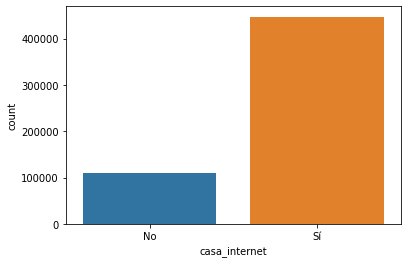

In [ ]:
#De forma gráfica nuestra variable se ve asi:
sns.countplot(data=df1, x='casa_internet')
plt.xticks(np.arange(2), ("No", "Sí"))
plt.show()

## Imputación predictiva

Otras variables presentaron más de un 10% de NaN. En ese caso
para su tratamiento  se utilizará la función "**fancyimpute**". 

Aunque se probaron otros métodos, los resultados fueron similares, y en algunos casos requerian una elevada memoria ram. 

A continuación se muestra el proceso para las 14 variables elegidas.

In [ ]:
mice_impute = IterativeImputer()
traindatafill = mice_impute.fit_transform(df1[['personas_vives', 'casa_compu', 'jardin_inf', 'repetiste', 'reexplic_doc', 
                                               'hacen_deporte','leen_libros','celular_propio','celular_internet',
                                               'bus_inf','grupo_otros','ayudan_otros','interp_mate','companeros']])
traindatafill= pd.DataFrame(traindatafill)

In [ ]:
traindatafill = traindatafill.astype('int')

In [ ]:
df1['personas_vives'] = traindatafill[0]
df1['casa_compu'] = traindatafill[1]
df1['jardin_inf'] = traindatafill[2]
df1['repetiste'] = traindatafill[3]
df1['reexplic_doc'] = traindatafill[4]
df1['hacen_deporte'] = traindatafill[5]
df1['leen_libros'] = traindatafill[6]
df1['celular_propio'] = traindatafill[7]
df1['celular_internet'] = traindatafill[8]
df1['grupo_otros'] = traindatafill[9]
df1['bus_inf'] = traindatafill[10]
df1['ayudan_otros'] = traindatafill[11]
df1['interp_mate'] = traindatafill[12]
df1['companeros'] = traindatafill[13]

In [ ]:
df1.isnull().sum()

sector                  0
ambito                  0
edad                    0
sexo                    0
nacionalidad            0
personas_vives      99905
casa_internet           0
casa_compu          99905
mama_niveledu       16111
papa_niveledu       63244
jardin_inf          99905
repetiste           99905
reexplic_doc        99905
hacen_deporte       99905
leen_libros         99905
celular_propio      99905
celular_internet    99905
bus_inf             99905
grupo_otros         99905
ayudan_otros        99905
interp_mate         99905
companeros          99905
target                  0
mpuntaje                0
ldesemp                 0
lpuntaje                0
isocioa                 0
edu__0.0                0
edu__1.0                0
edu__2.0                0
edu__3.0                0
provincia__1            0
provincia__2            0
provincia__3            0
provincia__4            0
provincia__5            0
dtype: int64

## Variable: **"personas_vives"**

Esta variable indicaba con cuantas personas convive el alumno, no obstante conteníaun elevado numero de Nan. Esto posiblemente se deba a que la consigna no fue clara o correctamente interpretada, por lo que procedimos a eliminarla.

```
# Esto tiene formato de código
```



In [ ]:
df1 = df1[df1['personas_vives'].notna()]

In [ ]:
df1.isnull().sum()

sector                   0
ambito                   0
cod_provincia            0
edad                     0
sexo                     0
nacionalidad             0
personas_vives           0
casa_internet            0
casa_compu               0
mama_niveledu       109699
papa_niveledu       157837
jardin_inf               0
repetiste                0
reexplic_doc             0
hacen_deporte            0
leen_libros              0
celular_propio           0
celular_internet         0
bus_inf                  0
grupo_otros              0
ayudan_otros             0
interp_mate              0
companeros               0
target                   0
mpuntaje                 0
ldesemp              11165
lpuntaje             11165
isocioa              93208
dtype: int64

## Unificación del nivel academico familiar

Creamos la variable "familia_edu"= "edu", que tomará el nivel educativo más alto de los padres de cada alumno. Asi se busca reducir la cantidad de nulos y simplificar una variable.

In [ ]:
familia_edu = df1[['mama_niveledu','papa_niveledu']].max(axis=1)

In [ ]:
familia_edu.isnull().sum()

93208

In [ ]:
df1 = pd.concat([df1, familia_edu], axis = 1)

In [ ]:
df1 = df1.rename(columns={0: 'edu'})

In [ ]:
df1 = df1[df1['edu'].notna()]

In [ ]:
df1.isnull().sum()

sector                  0
ambito                  0
cod_provincia           0
edad                    0
sexo                    0
nacionalidad            0
personas_vives          0
casa_internet           0
casa_compu              0
mama_niveledu       16491
papa_niveledu       64629
jardin_inf              0
repetiste               0
reexplic_doc            0
hacen_deporte           0
leen_libros             0
celular_propio          0
celular_internet        0
bus_inf                 0
grupo_otros             0
ayudan_otros            0
interp_mate             0
companeros              0
target                  0
mpuntaje                0
ldesemp              8452
lpuntaje             8452
isocioa                 0
edu                     0
dtype: int64

# Tratamiento de **"Dummies"**

Dadas las condiciones de algunas variables de nuestro dataset, consideramos que sería útil transformar algunas variables a través de la función get_dummies para poder luego obtener resultados.  


## Tratamiento de **"edu"**

Esta variable proviene de la unión de las variables de los niveles educativos maternos y paternos. 
En este caso contamos con 4 opciones donde la variable marca el máximo nivel educativo alcanzado por cualquiera de los progenitores.

In [ ]:
edu_dummies = pd.get_dummies(df1['edu'],prefix ='edu_')

In [ ]:
edu_dummies

edu__0.0  edu__1.0  edu__2.0  edu__3.0
0              0         1         0         0
2              0         1         0         0
3              0         1         0         0
4              0         0         1         0
5              0         0         0         1
...          ...       ...       ...       ...
556789         0         1         0         0
556793         0         1         0         0
556795         0         1         0         0
556797         0         0         0         1
556799         0         1         0         0

[436395 rows x 4 columns]

In [ ]:
df1 = pd.concat([df1, edu_dummies],axis=1)

In [ ]:
df1 = df1.drop(['edu'],axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436395 entries, 0 to 556799
Data columns (total 32 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sector            436395 non-null  int64  
 1   ambito            436395 non-null  int64  
 2   cod_provincia     436395 non-null  int64  
 3   edad              436395 non-null  float64
 4   sexo              436395 non-null  float64
 5   nacionalidad      436395 non-null  float64
 6   personas_vives    436395 non-null  float64
 7   casa_internet     436395 non-null  float64
 8   casa_compu        436395 non-null  float64
 9   mama_niveledu     419904 non-null  float64
 10  papa_niveledu     371766 non-null  float64
 11  jardin_inf        436395 non-null  float64
 12  repetiste         436395 non-null  float64
 13  reexplic_doc      436395 non-null  float64
 14  hacen_deporte     436395 non-null  float64
 15  leen_libros       436395 non-null  float64
 16  celular_propio    43

De esta manera tenermos las  4 opciones de "edu" como una variable cada una de ellas dentro de nuestro dataframe.

## Tratamiento del **"cod_provincia"**

En este caso, cod_provincia provenia de la agrupación de las provincias argentinas en 5 regiones. 
Ahora, procederemos a convertir cada una de ellas en una variable. 

In [ ]:
prov_dummies = pd.get_dummies(df1['cod_provincia'], 
                             prefix='provincia_')

In [ ]:
prov_dummies

provincia__1  provincia__2  provincia__3  provincia__4  provincia__5
0                  0             0             1             0             0
2                  0             0             1             0             0
3                  0             0             1             0             0
4                  0             0             1             0             0
5                  0             0             1             0             0
...              ...           ...           ...           ...           ...
556789             0             1             0             0             0
556793             0             1             0             0             0
556795             0             1             0             0             0
556797             0             1             0             0             0
556799             0             1             0             0             0

[436395 rows x 5 columns]

In [ ]:
df1 = pd.concat([df1, prov_dummies], axis = 1)

In [ ]:
df1 = df1.drop(['cod_provincia'],axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436395 entries, 0 to 556799
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sector            436395 non-null  int64  
 1   ambito            436395 non-null  int64  
 2   edad              436395 non-null  float64
 3   sexo              436395 non-null  float64
 4   nacionalidad      436395 non-null  float64
 5   personas_vives    436395 non-null  float64
 6   casa_internet     436395 non-null  float64
 7   casa_compu        436395 non-null  float64
 8   mama_niveledu     419904 non-null  float64
 9   papa_niveledu     371766 non-null  float64
 10  jardin_inf        436395 non-null  float64
 11  repetiste         436395 non-null  float64
 12  reexplic_doc      436395 non-null  float64
 13  hacen_deporte     436395 non-null  float64
 14  leen_libros       436395 non-null  float64
 15  celular_propio    436395 non-null  float64
 16  celular_internet  43

Nuevamente podemos revisar que efectivamente tenemos el dataframe esperado. En este caso, "cod_provincia" se reemplazó por "provincia" en su nuevo formato. 

# Limpieza de nulos **"ldesemp"**

Dada la importancia de esta variable, es necesario realizar la limpieza de nulos.

In [ ]:
df1 = df1[df1['ldesemp'].notna()]

# Visualización del dataframe terminado

En esta etapa y luego de los tratamientos realizados, procedemos a generar un nuevo dataframe con las variables corregidas y visualizarlas para controlar que sea el resultado esperado.

In [ ]:
dfinal = df1[['sector','ambito','edad', 'sexo', 'nacionalidad', 'personas_vives','casa_internet',
              'casa_compu','jardin_inf','repetiste','reexplic_doc','hacen_deporte',
              'leen_libros','celular_propio','celular_internet','bus_inf', 'grupo_otros',
              'ayudan_otros','interp_mate','edu__0.0','edu__1.0','edu__2.0',
              'edu__3.0','provincia__1','provincia__2','provincia__3',
              'provincia__4','provincia__5','target','ldesemp']]

In [ ]:
dfinal.sample(10)

sector  ambito  edad  sexo  nacionalidad  personas_vives  \
358940       0       1   1.0   0.0           1.0             1.0   
303235       1       1   0.0   0.0           1.0             0.0   
59630        1       1   0.0   0.0           1.0             0.0   
53365        1       1   0.0   0.0           0.0             1.0   
495281       1       1   1.0   1.0           1.0             0.0   
260839       1       1   1.0   0.0           1.0             0.0   
507039       1       1   1.0   0.0           1.0             1.0   
26620        1       1   0.0   0.0           1.0             0.0   
5030         1       1   0.0   0.0           1.0             1.0   
107876       1       1   0.0   1.0           1.0             0.0   

        casa_internet  casa_compu  jardin_inf  repetiste  ...  edu__1.0  \
358940            1.0         1.0         1.0        0.0  ...         0   
303235            1.0         1.0         1.0        0.0  ...         0   
59630             0.0         1.0         1.0        0.0  ...         0   
53365             0.0         1.0         1.0        0.0  ...         0   
495281            1.0         0.0         0.0        0.0  ...         1   
260839            1.0         0.0         1.0        0.0  ...         0   
507039            1.0         1.0         1.0        0.0  ...         0   
26620             0.0         1.0         1.0        0.0  ...         0   
5030              1.0         1.0         1.0        0.0  ...         0   
107876            1.0         1.0         1.0        0.0  ...         0   

        edu__2.0  edu__3.0  provincia__1  provincia__2  provincia__3  \
358940         0         1             1             0             0   
303235         1         0             1             0             0   
59630          1         0             0             0             1   
53365          1         0             0             0             1   
495281         0         0             0             0             0   
260839         1         0             0             0             1   
507039         0         1             0             0             1   
26620          1         0             0             0             1   
5030           1         0             0             0             1   
107876         1         0             0             0             1   

        provincia__4  provincia__5  target  ldesemp  
358940             0             0     0.0      1.0  
303235             0             0     0.0      1.0  
59630              0             0     0.0      1.0  
53365              0             0     0.0      1.0  
495281             1             0     0.0      0.0  
260839             0             0     1.0      1.0  
507039             0             0     1.0      0.0  
26620              0             0     0.0      1.0  
5030               0             0     1.0      1.0  
107876             0             0     1.0      1.0  

[10 rows x 30 columns]

In [ ]:
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427943 entries, 0 to 556799
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sector            427943 non-null  int64  
 1   ambito            427943 non-null  int64  
 2   edad              427943 non-null  float64
 3   sexo              427943 non-null  float64
 4   nacionalidad      427943 non-null  float64
 5   personas_vives    427943 non-null  float64
 6   casa_internet     427943 non-null  float64
 7   casa_compu        427943 non-null  float64
 8   jardin_inf        427943 non-null  float64
 9   repetiste         427943 non-null  float64
 10  reexplic_doc      427943 non-null  float64
 11  hacen_deporte     427943 non-null  float64
 12  leen_libros       427943 non-null  float64
 13  celular_propio    427943 non-null  float64
 14  celular_internet  427943 non-null  float64
 15  bus_inf           427943 non-null  float64
 16  grupo_otros       42

In [ ]:
dfinal.isnull().sum()

sector              0
ambito              0
edad                0
sexo                0
nacionalidad        0
personas_vives      0
casa_internet       0
casa_compu          0
jardin_inf          0
repetiste           0
reexplic_doc        0
hacen_deporte       0
leen_libros         0
celular_propio      0
celular_internet    0
bus_inf             0
grupo_otros         0
ayudan_otros        0
interp_mate         0
edu__0.0            0
edu__1.0            0
edu__2.0            0
edu__3.0            0
provincia__1        0
provincia__2        0
provincia__3        0
provincia__4        0
provincia__5        0
target              0
ldesemp             0
dtype: int64

Los datos parecen estar de acuerdo a lo esperado. 
Podemos realizar un gráfico de correlación para comprobar los cambios y sus efectos.

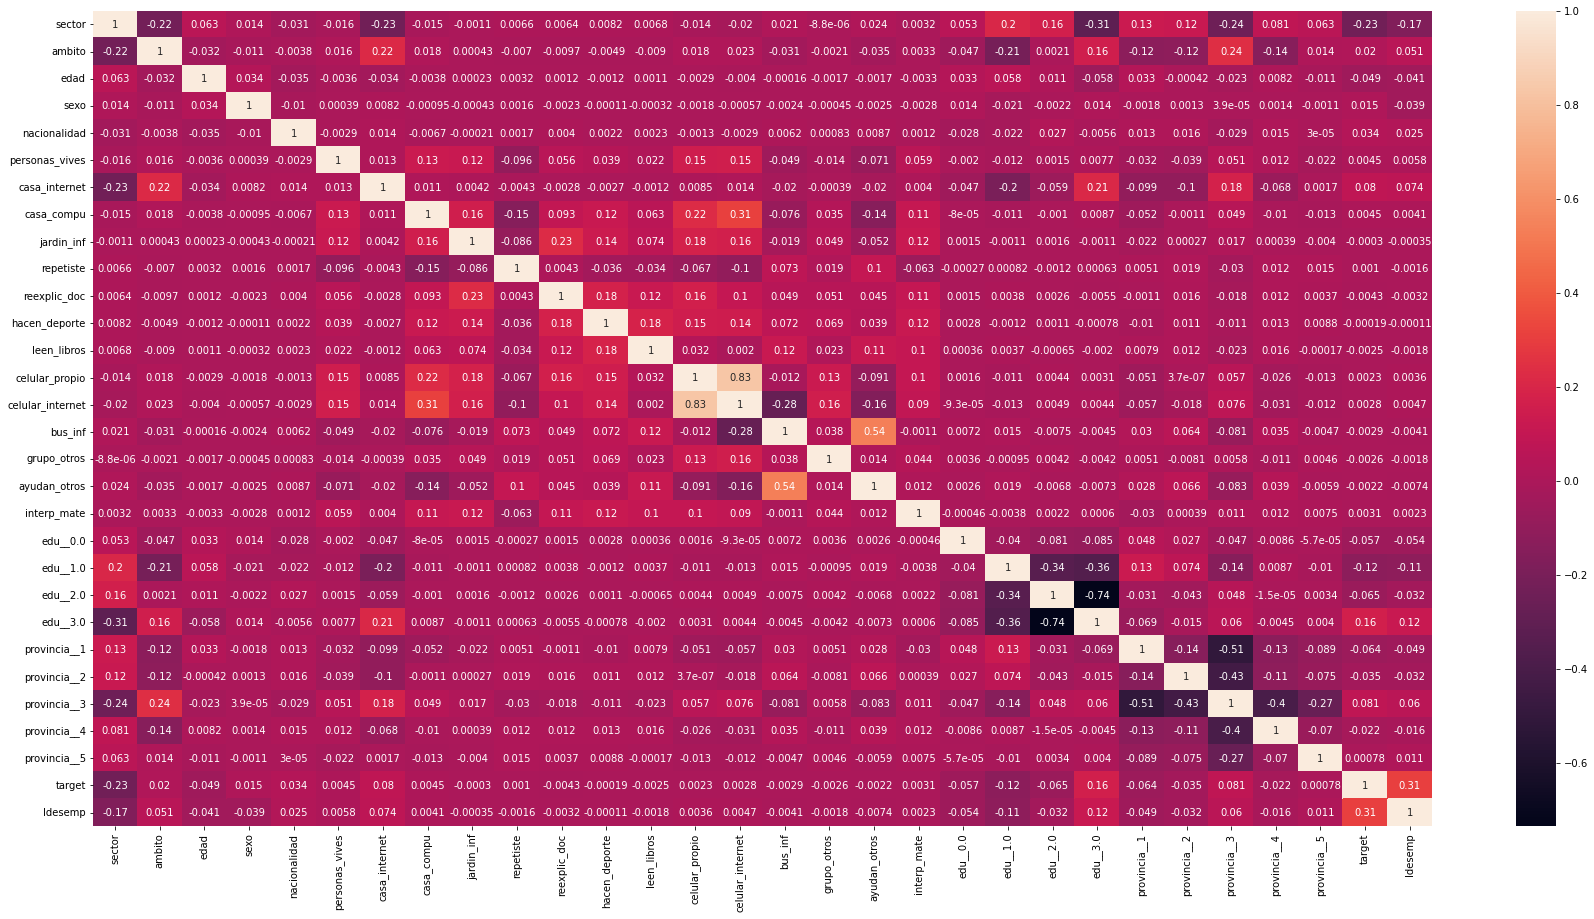

In [ ]:
fig, ax=plt.subplots(figsize=(30,15))
ax=sns.heatmap(dfinal.corr(),annot=True)
plt.show()

In [ ]:
#Correlación del resto de variables con nuestra variable "target"
dfinal.corr()['target'] 

sector             -0.231296
ambito              0.019639
edad               -0.049358
sexo                0.014910
nacionalidad        0.033789
personas_vives      0.004523
casa_internet       0.080395
casa_compu          0.004476
jardin_inf         -0.000303
repetiste           0.001039
reexplic_doc       -0.004282
hacen_deporte      -0.000191
leen_libros        -0.002479
celular_propio      0.002274
celular_internet    0.002763
bus_inf            -0.002940
grupo_otros        -0.002569
ayudan_otros       -0.002246
interp_mate         0.003131
edu__0.0           -0.057207
edu__1.0           -0.123951
edu__2.0           -0.065147
edu__3.0            0.163169
provincia__1       -0.063983
provincia__2       -0.035168
provincia__3        0.081070
provincia__4       -0.021835
provincia__5        0.000776
target              1.000000
ldesemp             0.306484
Name: target, dtype: float64

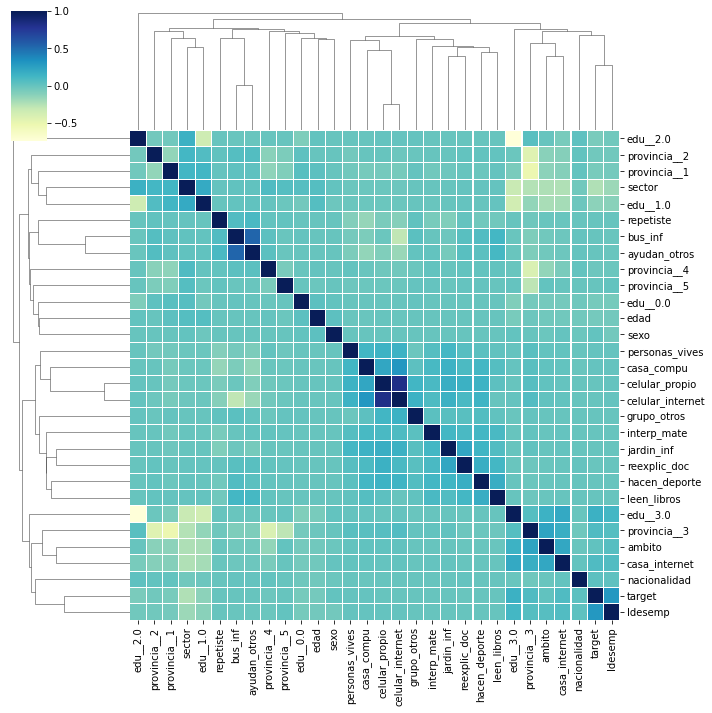

In [ ]:
#Otra forma de graficar nuestros resultados:
corrmat = dfinal.corr()
grafico = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);
plt.setp(grafico.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)
grafico

In [ ]:
dfinal.shape
#Nuestro dataframe final cuenta con  427943 filas y 30 columnas

(427943, 30)

In [ ]:
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427943 entries, 0 to 556799
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sector            427943 non-null  int64  
 1   ambito            427943 non-null  int64  
 2   edad              427943 non-null  float64
 3   sexo              427943 non-null  float64
 4   nacionalidad      427943 non-null  float64
 5   personas_vives    427943 non-null  float64
 6   casa_internet     427943 non-null  float64
 7   casa_compu        427943 non-null  float64
 8   jardin_inf        427943 non-null  float64
 9   repetiste         427943 non-null  float64
 10  reexplic_doc      427943 non-null  float64
 11  hacen_deporte     427943 non-null  float64
 12  leen_libros       427943 non-null  float64
 13  celular_propio    427943 non-null  float64
 14  celular_internet  427943 non-null  float64
 15  bus_inf           427943 non-null  float64
 16  grupo_otros       42

# Guardar el DataSet **"dfinal"**

En este punto y debido al tiempo que llevan las operaciones, recomendamos guardar el dataframe obrtenido: "dfinal" y proseguir los siguientes pasos en un nuevo collab. 


In [ ]:
dfinal.to_csv('dfinal.csv')

A pedido de nuestro tutor y para una revisión más práctica, se encuentra a continuación las etapas siguientes.

--------------------------------------------------
--------------------------------------------------
#--- **SEGUNDA PARTE** ---


# Carga de librerías

Se procede a instalar aquellas librarías pertinentes que aún no se hayan ejecutado en el presente collab. 

In [ ]:
# Tratamiento de datos
# ==============================================================================
#import pandas as pd
#import numpy as np

# Generación de gráficos
# ==============================================================================
from matplotlib import pyplot
#import seaborn as sns

# Algoritmo de refuerzo 
# ==============================================================================
import lightgbm as lgb

# Aprendizaje automático
# ==============================================================================
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from collections import Counter
import xgboost as xg
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score

# Curva de ROC
# ==============================================================================
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Carga del DataFrame procesado previamente

In [ ]:
dfinal = pd.read_csv('dfinal.csv') #Importación del dataset
dfinal = dfinal.round(0) #Redondeo de los decimales
dfinal.drop('Unnamed: 0',axis=1,inplace=True) #Eliminación de la primer columna.

In [ ]:
(dfinal.value_counts()
 .reset_index() #Convierto los índices de la serie en columnas de un dataframe
 .sort_values(0) #Ordeno por la columna llamada 0
 .head(5)) #Muestro los primeros 5 registros

sector  ambito  edad  sexo  nacionalidad  personas_vives  \
83907        1       1   0.0   1.0           1.0             1.0   
111871       0       1   1.0   1.0           1.0             1.0   
111872       0       1   1.0   1.0           1.0             1.0   
111873       0       1   1.0   1.0           1.0             1.0   
111874       0       1   1.0   1.0           1.0             1.0   

        casa_internet  casa_compu  jardin_inf  repetiste  ...  edu__2.0  \
83907             1.0         0.0         1.0        0.0  ...         0   
111871            1.0         0.0         1.0        0.0  ...         0   
111872            1.0         0.0         1.0        0.0  ...         0   
111873            1.0         0.0         1.0        0.0  ...         0   
111874            1.0         0.0         1.0        0.0  ...         0   

        edu__3.0  provincia__1  provincia__2  provincia__3  provincia__4  \
83907          1             0             1             0             0   
111871         0             1             0             0             0   
111872         0             0             0             1             0   
111873         1             0             0             0             1   
111874         1             0             0             1             0   

        provincia__5  target  ldesemp  0  
83907              0     1.0      1.0  1  
111871             0     0.0      1.0  1  
111872             0     0.0      1.0  1  
111873             0     1.0      1.0  1  
111874             0     1.0      1.0  1  

[5 rows x 31 columns]

In [ ]:
dfinal.isnull().sum()

sector              0
ambito              0
edad                0
sexo                0
nacionalidad        0
personas_vives      0
casa_internet       0
casa_compu          0
jardin_inf          0
repetiste           0
reexplic_doc        0
hacen_deporte       0
leen_libros         0
celular_propio      0
celular_internet    0
bus_inf             0
grupo_otros         0
ayudan_otros        0
interp_mate         0
edu__0.0            0
edu__1.0            0
edu__2.0            0
edu__3.0            0
provincia__1        0
provincia__2        0
provincia__3        0
provincia__4        0
provincia__5        0
target              0
ldesemp             0
dtype: int64

# Separación del DataFrame

A continuación dividimos nuestro dataframe en aquellos que se usaran para entrenar los modelos, y los de prueba. 

In [ ]:
#Seperamos en X e y la X mayuscula por que es matriz y es vector
X_f = dfinal.drop("target", axis=1) #Datos para entrenar el modelo (variables independientes)
y_f = dfinal.target #Datos para validar el modelo (variables independientes)

#Esto sólo se hace una vez para el dataset original
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f,y_f,train_size=0.67,test_size=0.33,random_state=42) 

# Carga de librerías de los modelos

Para mayor información de cada modelo, es posible acceder a los enlaces que se adjuntan en los comentarios de cada uno de ellos. 

In [ ]:
sgd   = SGDClassifier() #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
ridge = RidgeClassifier() #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html
knn   = KNeighborsClassifier() #https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
bag   = BaggingClassifier() #https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
rf    = RandomForestClassifier(n_estimators=10) #https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
lr    = LogisticRegression() #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
lgg   = lgb.LGBMClassifier() #https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html
xgb  = xg.XGBClassifier(objective ='reg:logistic') #https://xgboost.readthedocs.io/en/stable/parameter.html

In [ ]:
#Generación de un data frame vacio donde colocaremos los resultados de los modelos
cols = ['Case','SGD','Ridge','KNN','Bagging','RndForest','LogReg','LGB','XGBR']

resul = pd.DataFrame(columns=cols)
resul.set_index("Case",inplace=True)
resul.loc['Accuracy'] = [0,0,0,0,0,0,0,0]
resul.loc['F1'] = [0,0,0,0,0,0,0,0]
resul.loc['Precision'] = [0,0,0,0,0,0,0,0]
resul.loc['Recall'] = [0,0,0,0,0,0,0,0]

# Entrenamiento e impresión de los resultados

Para cada uno de los modelos se realiza un bucle que recolecta la información.


In [ ]:
#Se crea una lista con diferentes modelos que serán entrenados

models = [sgd,ridge,knn,bag,rf,lr,lgg,xgb]

col = 0
for model in models: 
    model.fit(X_train_f,y_train_f) 
    resul.iloc[0,col] = model.score(X_test_f,y_test_f) 
    y_pred = model.predict(X_test_f) 
    resul.iloc[1,col] = f1_score(y_test_f, y_pred) 
    resul.iloc[2,col] = precision_score(y_test_f, y_pred) 
    resul.iloc[3,col] = recall_score(y_test_f, y_pred) 
    col += 1
   
resul.head()

SGD     Ridge       KNN   Bagging RndForest    LogReg  \
Case                                                                    
Accuracy   0.681827  0.684369  0.630752  0.643094  0.646387  0.685375   
F1         0.779317  0.777763  0.710821  0.723594  0.727529   0.77701   
Precision   0.67144  0.677525  0.675503  0.680825  0.681488  0.680198   
Recall     0.928495  0.912812  0.750035  0.772095  0.780241  0.905954   

                LGB      XGBR  
Case                           
Accuracy   0.686968  0.687173  
F1         0.773017  0.775253  
Precision  0.688641    0.6857  
Recall     0.880957  0.891712

La operación anterior lleva mucho tiempo. 

### ROC-AUC Random Forest Classifier.

In [ ]:
y_score1 = rf.predict_proba(X_test_f)[:,1]
y_score1

array([0.74333333, 0.82131606, 0.35      , ..., 0.9       , 0.74240537,
       0.1       ])

In [ ]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test_f, y_score1)

In [ ]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test_f, y_score1))

roc_auc_score for DecisionTree:  0.6556708830703533


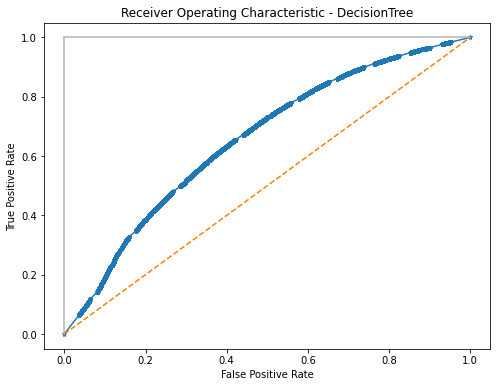

roc_auc_score for DecisionTree:  0.6556708830703533


In [ ]:
 pyplot.subplots(1, figsize=(8,6))
pyplot.title('Receiver Operating Characteristic - DecisionTree')
pyplot.plot(false_positive_rate1, true_positive_rate1,marker='*', markersize=5)
pyplot.plot([0, 1], ls="--")
pyplot.plot([0, 0], [1, 0] , c=".7"), pyplot.plot([1, 1] , c=".7")
pyplot.ylabel('True Positive Rate')
pyplot.xlabel('False Positive Rate')
pyplot.show()
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test_f, y_score1))

### ROC-AUC Logistic Regression. 

In [ ]:
ns_probs = [0 for _ in range(len(y_test_f))]

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.711


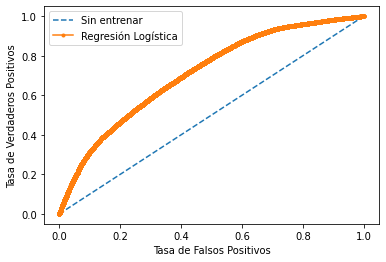

In [ ]:
lr_probs = lr.predict_proba(X_test_f)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test_f, ns_probs)
lr_auc = roc_auc_score(y_test_f, lr_probs)
# Imprimimos en y_test_f
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test_f, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_f, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

# Muestra del DataFrame

Para la optimización tomamos una fracción del DataSet del mismo ya que su tamaño es muy elevado.

Tomamos el 1% son 4279 muestras.

In [ ]:
df_sample=dfinal.sample(frac=0.01,random_state=24) #Muestra del 1%.

In [ ]:
len(df_sample)

4279

# Entrenamiento de la muestra.

In [ ]:
#Separamos en "X" e "y"; la "X" mayuscula por que es matriz, mientras que "y" es vector
X_s = df_sample.drop("target", axis=1) #Elimino de mi dataset la variable a predecir
y_s = df_sample.target #Defino el Target
#Me quedo con 33% para test y 67% para train
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s,y_s,train_size=0.67,test_size=0.33,random_state=42) #Separo en train y test]
#Aquí se eligen el train y test para la muestra aleatoria

# Hyperparameter Tuning

## Optimización de RandomForest

Utilizamos GridSearchCV optimizar Random Forest.


In [ ]:
# Entrenamientos
# ==============================================================================
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### Grid Search CV

Limitaciones:
- Los resultados de los "mejores parámetros" son limitados, y
- el proceso lleva mucho tiempo

In [ ]:
n_estimators=[int(x) for x in np.linspace(start=10, stop=80, num=10)]
max_features=['auto','sqrt']
max_depth=[2,4,8]
min_samples_split=[2,5,7]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]
random_state=[42] 

In [ ]:
param_grid={'n_estimators' : n_estimators,
'max_features' : max_features,
'max_depth': max_depth,
'min_samples_split' : min_samples_split,
'min_samples_leaf' : min_samples_leaf,
'bootstrap': bootstrap,
'random_state':random_state
}

In [ ]:
rf_Model=RandomForestClassifier()
rf_Grid=GridSearchCV(estimator=rf_Model,param_grid=param_grid,cv=5,verbose=2,n_jobs=4)
rf_Grid.fit(X_train_s,y_train_s)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80],
                         'random_state': [42]},
             verbose=2)

#### Mejores parámetros y diferencia de Accuracy para Modelo de Ramdon Forest.

In [ ]:
print("Mejores Parámetros", rf_Grid.best_params_)
print("Mejor CV score", rf_Grid.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test_s, rf_Grid.predict(X_test_s)), 5)}')

Mejores Parámetros {'bootstrap': False, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 42}
Mejor CV score 0.680735295011888
Accuracy del modelo = 0.67799


#### Resultado optimizados de Ramdon Forest en del DataFrame completo.

In [ ]:
y_pred=rf_Grid.predict(X_test_f)
print(classification_report(y_pred=y_pred, y_true= y_test_f))

              precision    recall  f1-score   support

         0.0       0.72      0.30      0.42     55774
         1.0       0.67      0.92      0.78     85448

    accuracy                           0.68    141222
   macro avg       0.70      0.61      0.60    141222
weighted avg       0.69      0.68      0.64    141222



## Optimización de la Regresión Logística

### Grid Search CV

In [ ]:
logModel=LogisticRegression()

In [ ]:
param_grid_lr=[
{'penalty' : ['l2'],
'C': np.logspace(-4,4,20),
'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
'max_iter':[100,1000,2500,5000],
'random_state':[24,42,123,0]
}
]

In [ ]:
clf_lr=GridSearchCV(logModel,param_grid=param_grid_lr,cv=5,verbose=True,n_jobs=-1)
best_clf_lr=clf_lr.fit(X_train_s,y_train_s)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


#### Mejores parámetros y diferencia de Accuracy para Modelo de Regresión Logística.

In [ ]:
print("Mejores Parametros", clf_lr.best_params_)
print("Mejor CV score", clf_lr.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test_s, clf_lr.predict(X_test_s)), 5)}')

Mejores Parametros {'C': 1.623776739188721, 'max_iter': 100, 'penalty': 'l2', 'random_state': 24, 'solver': 'liblinear'}
Mejor CV score 0.6793318374470207
Accuracy del modelo = 0.67374


#### Resultado optimizados de Regresión Lógistica en del DataFrame completo.

In [ ]:
LR_best=LogisticRegression(C=1.623776739188721, max_iter=100,penalty='l2',solver='lbfgs',random_state=24).fit(X_train_f,y_train_f)

In [ ]:
y_pred_LR=LR_best.predict(X_test_f)
print(classification_report(y_pred=y_pred_LR, y_true= y_test_f)) #Métricas de la regresión logística evaluadas en el dataset original

              precision    recall  f1-score   support

         0.0       0.71      0.35      0.47     55774
         1.0       0.68      0.91      0.78     85448

    accuracy                           0.69    141222
   macro avg       0.69      0.63      0.62    141222
weighted avg       0.69      0.69      0.65    141222



# Validación Simple

In [ ]:
from sklearn.model_selection import cross_val_score
from numpy import mean, std

In [ ]:
# Crear modelo
model = RandomForestClassifier(random_state=1,n_estimators=30, criterion="gini",max_depth=4)

In [ ]:
# Evaluar el modelo
scores = cross_val_score(model,X_s,y_s,scoring='accuracy')

In [ ]:
scores

array([0.67172897, 0.69042056, 0.66471963, 0.67406542, 0.67368421])

In [ ]:
# Reportar el performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.675 (0.008)


#Futuras líneas

Para la mejora de este proyecto creemos que podría ser bastante interesante analizar otros años con la finalidad de ver cómo se comportan las variables predictoras a través vez del tiempo, de igual forma se podría hacer la misma evaluación para la predicción del desempeño de los alumnos en el área de lengua. 

Otro posible análisis sería ver el desempeño de cada región ya que cada uno utiliza metodologías pedagógicas diferentes.



### Agradecimiento

Queremos agradecer especialmente la buena predisposición y ayuda de nuestro tutor: Rogelio Tobar De La Cruz, que nos guió a través de este aprendizaje y nos brindo herramientas a lo largo del camino para resolver los problemas que se nos presentaron.
